In [93]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [94]:
%run mylibrary.ipynb
%run mymodel.ipynb

In [95]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random
from ast import literal_eval

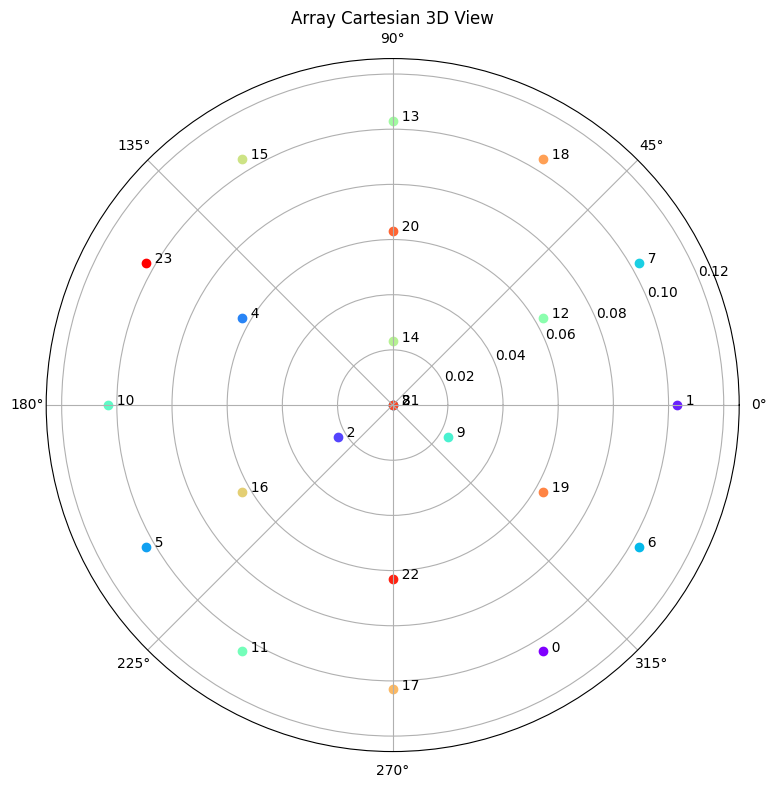

In [83]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar(fig_size=(10,9),save_dir = 'plot/')

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat', 'random_signal_source_info_5.dat', 'random_signal_source_info_6.dat', 'random_signal_source_info_7.dat', 'random_signal_source_info_8.dat', 'random_signal_source_info_9.dat', 'random_signal_source_info_10.dat', 'random_signal_source_info_11.dat', 'random_signal_source_info_12.dat', 'random_signal_source_info_13.dat', 'random_signal_source_info_14.dat', 'random_signal_source_info_15.dat', 'random_signal_source_info_16.dat', 'random_signal_source_info_17.dat', 'random_signal_source_info_18.dat', 'random_signal_source_info_19.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin', 'random_signal_source_info_5_tau.bin', 'random_signal_source_info_6_tau.bin', 'random_signal_

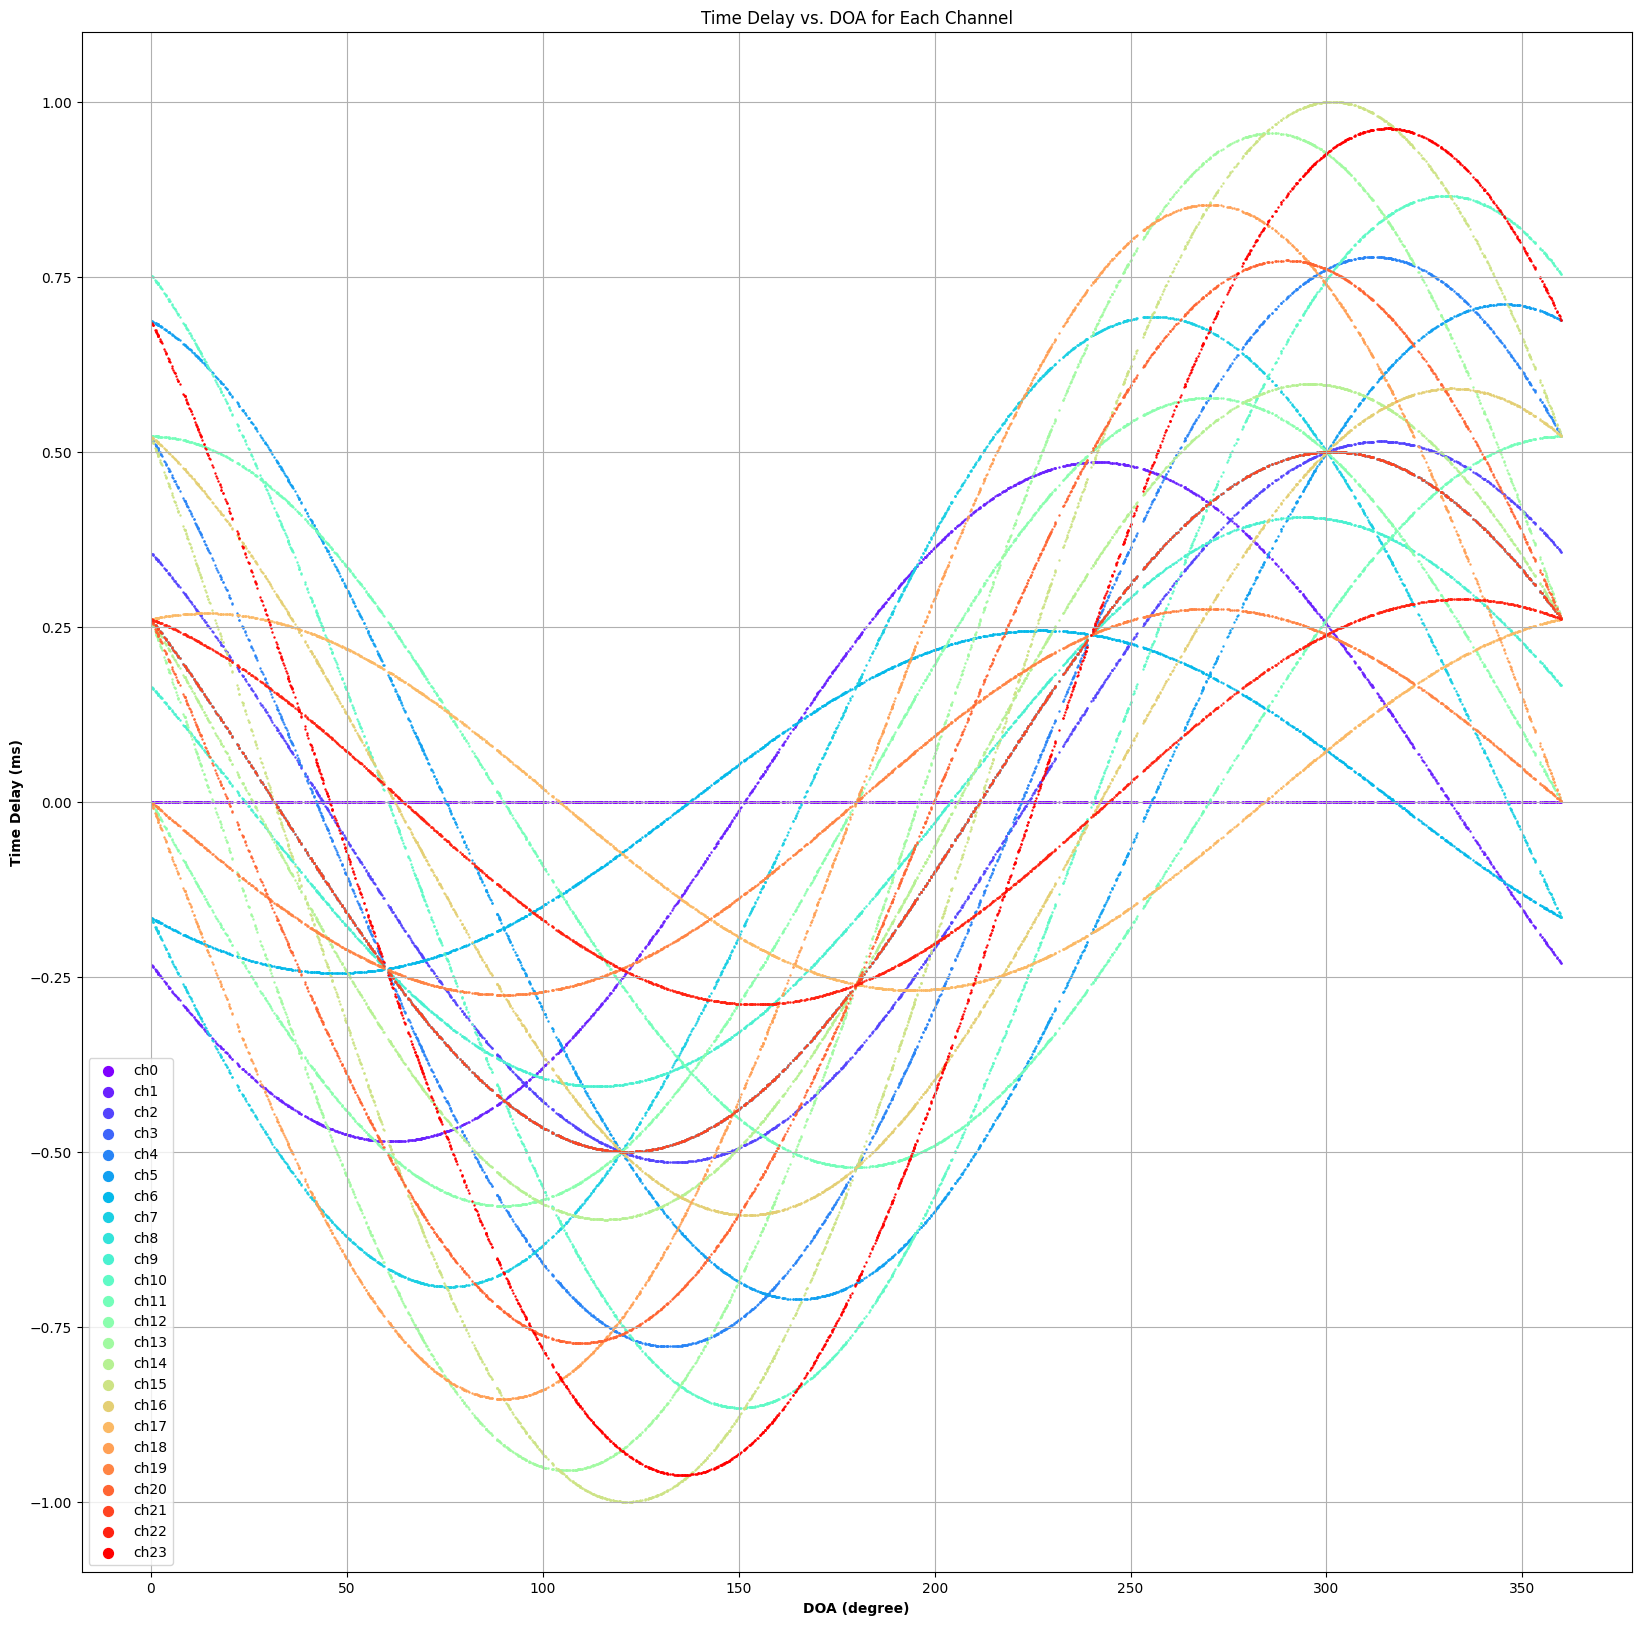

In [84]:
# Extract data from files
data = DataExtract("../data/rss360/", 24)
inputs, labels = data.get_delays_angles()
data.plot()

In [87]:
df_with_he = pd.read_csv("plot/models_evaluation_with_weights_initialization.csv")
list_channels = [re.findall(r'\d+',item['Channels']) for i,item in df_without_he.iterrows()]
list_channels = [sorted([int(i) for i in ls]) for ls in list_channels]
list_channels

[[1, 14, 21],
 [12, 14, 20],
 [10, 11, 13],
 [8, 17, 22],
 [6, 11, 20],
 [7, 8, 21],
 [0, 12, 22],
 [8, 11, 13],
 [2, 10, 22],
 [7, 15, 22],
 [8, 16, 23],
 [1, 4, 14],
 [1, 5, 12],
 [7, 8, 11],
 [3, 11, 17],
 [6, 12, 13],
 [3, 7, 10],
 [4, 13, 23],
 [10, 13, 22],
 [4, 9, 15],
 [4, 16, 17],
 [3, 10, 13],
 [3, 10, 13],
 [8, 10, 15],
 [6, 16, 22],
 [15, 19, 21],
 [1, 13, 19],
 [5, 18, 21],
 [3, 4, 21],
 [7, 9, 11],
 [8, 15, 17],
 [0, 7, 18],
 [1, 14, 21],
 [17, 20, 22],
 [5, 13, 14],
 [4, 14, 22],
 [0, 15, 23],
 [5, 15, 23],
 [3, 7, 10],
 [0, 2, 12],
 [2, 10, 19],
 [3, 9, 20],
 [6, 15, 21],
 [3, 12, 20],
 [10, 12, 13],
 [0, 7, 17],
 [10, 11, 18],
 [13, 14, 16],
 [5, 12, 22],
 [15, 19, 23],
 [0, 2, 4, 6, 14, 23],
 [2, 4, 5, 6, 10, 16],
 [1, 5, 6, 15, 16, 22],
 [2, 5, 9, 13, 17, 22],
 [2, 10, 12, 14, 20, 23],
 [5, 6, 7, 13, 19, 23],
 [5, 11, 13, 15, 21, 22],
 [3, 8, 14, 15, 16, 17],
 [10, 14, 16, 17, 20, 21],
 [0, 1, 2, 13, 14, 15],
 [0, 2, 5, 7, 9, 18],
 [2, 3, 9, 10, 11, 15],
 [4, 8, 9, 1

In [102]:
# Get the list of channels with loss less than 55 
# The 75 is a convience number from the results
top_with_he =  df_with_he.index[df_with_he['Loss'] < 55].tolist()
top_list_channels = [list_channels[i] for i in top_with_he]
top_list_channels.append(list(range(0,24)))
print(len(top_list_channels))
top_list_channels

15


[[6, 12, 13],
 [1, 13, 19],
 [0, 7, 18],
 [3, 12, 20],
 [12, 13, 15, 17, 19, 22],
 [2, 9, 10, 12, 17, 18],
 [2, 7, 9, 13, 19, 20],
 [8, 12, 16, 18, 21, 22],
 [2, 6, 8, 9, 12, 15, 18, 20, 22],
 [0, 2, 4, 8, 9, 12, 18, 19, 22],
 [1, 2, 3, 4, 9, 13, 17, 18, 22],
 [0, 3, 5, 6, 9, 12, 14, 15, 18, 19, 20, 23],
 [2, 3, 4, 6, 8, 10, 12, 13, 14, 15, 17, 18, 19, 22, 23],
 [0, 1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23]]

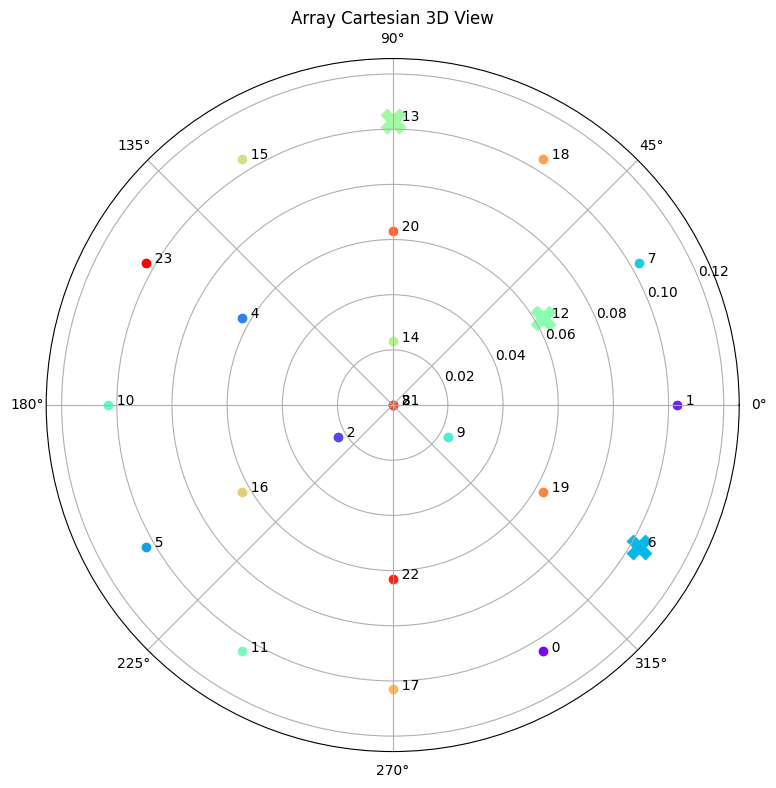

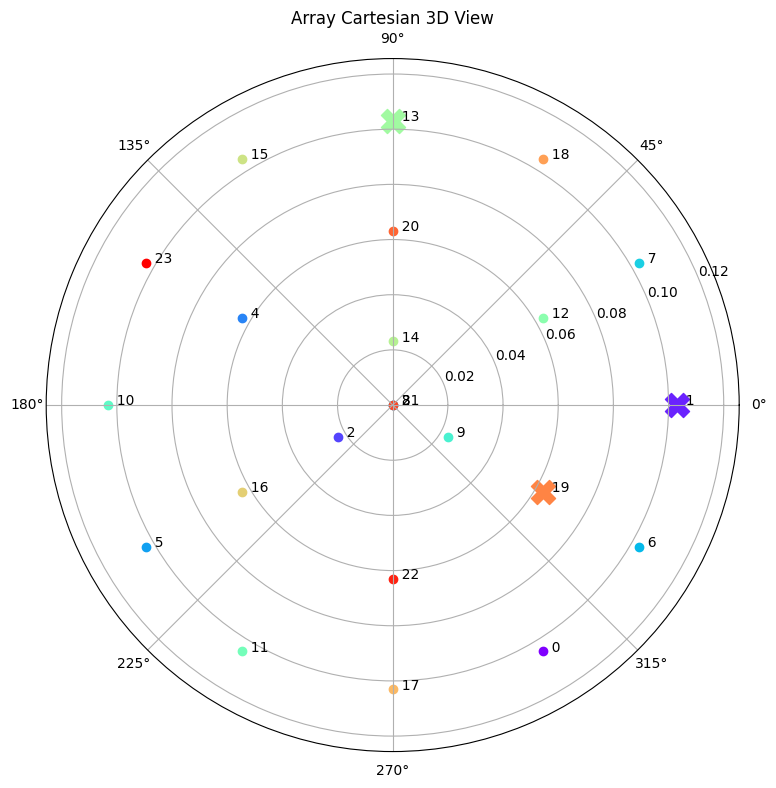

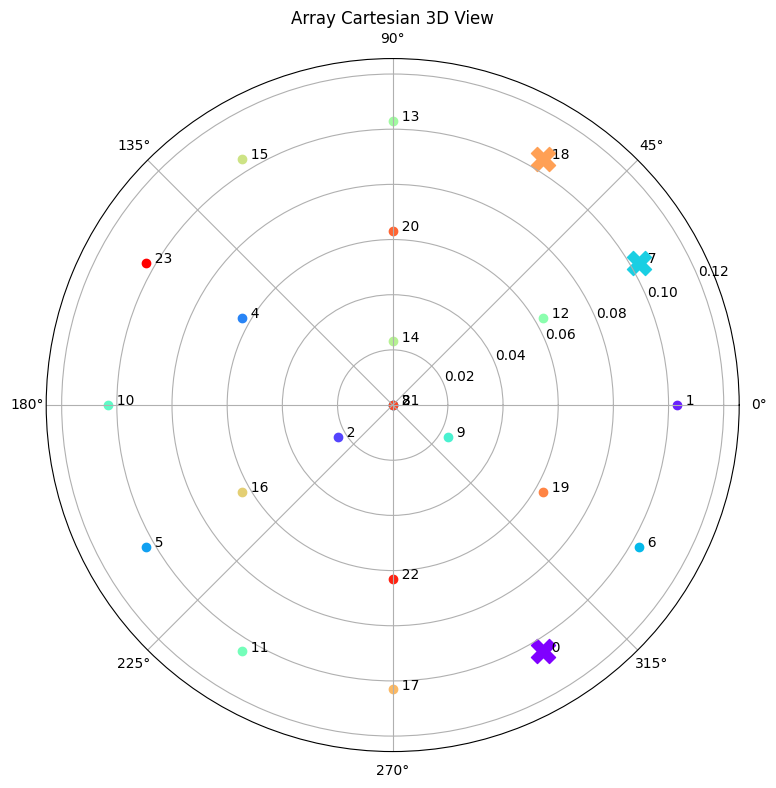

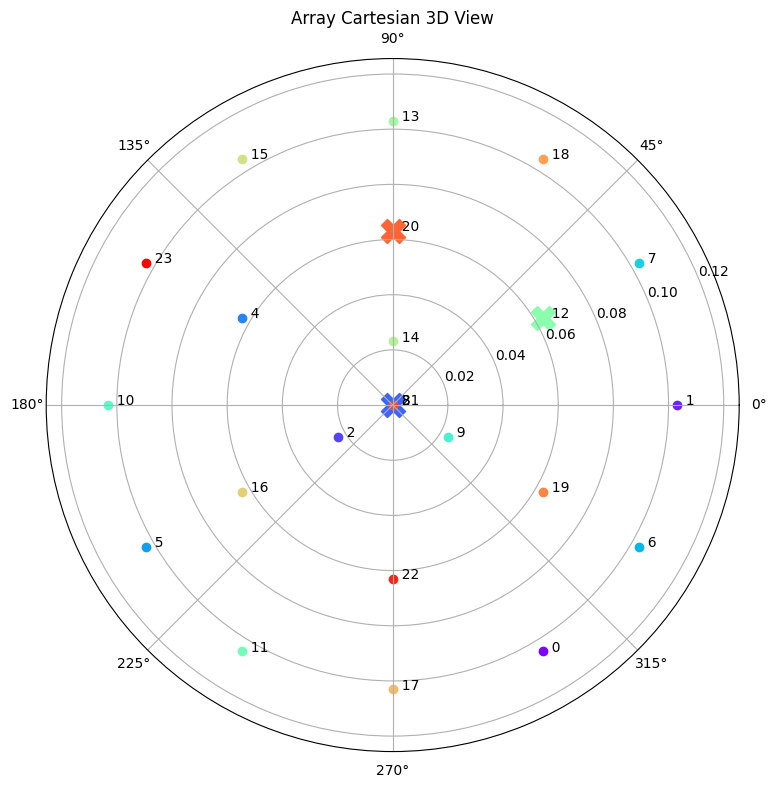

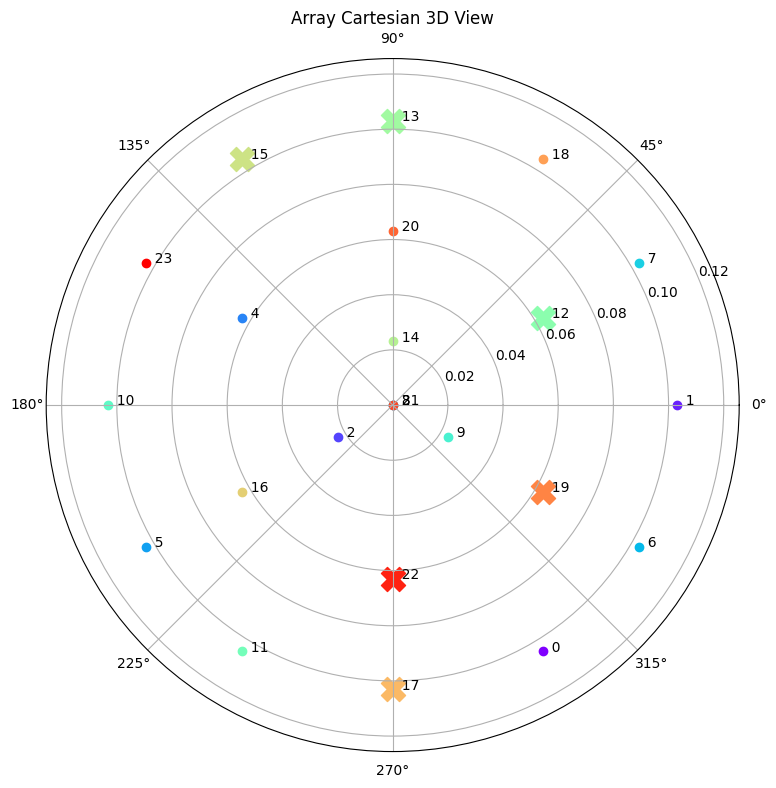

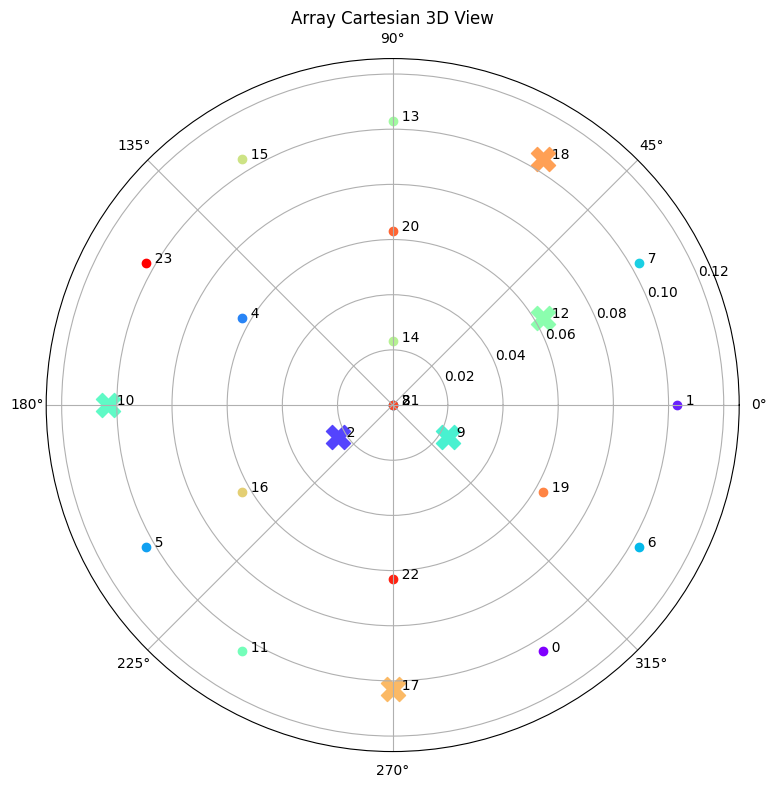

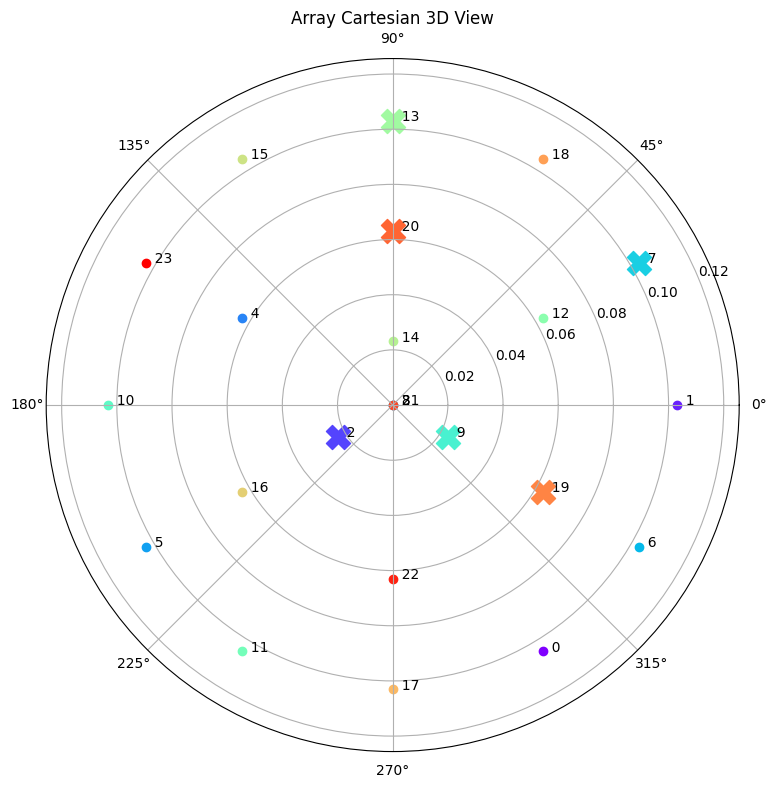

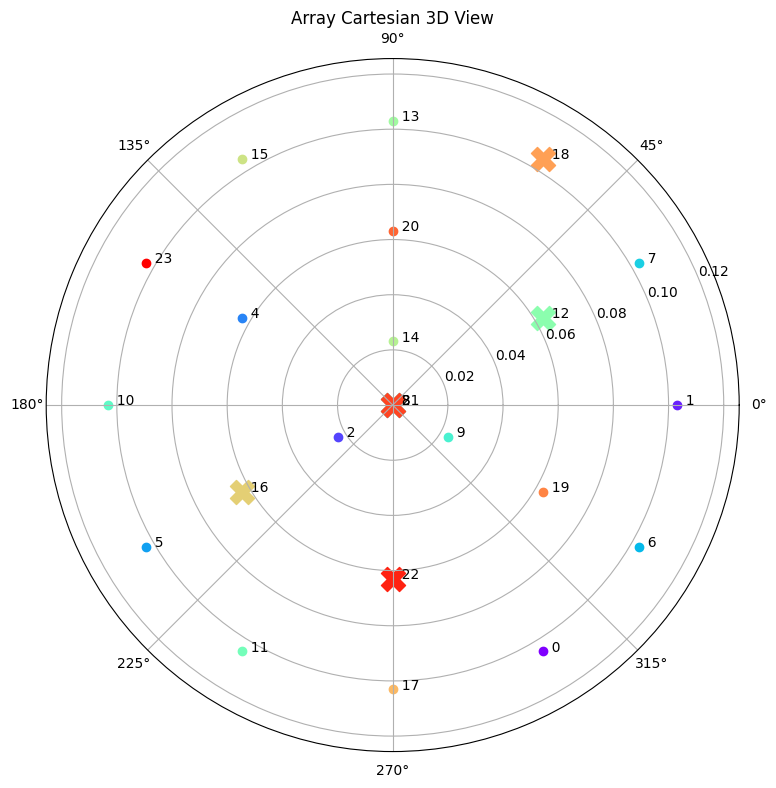

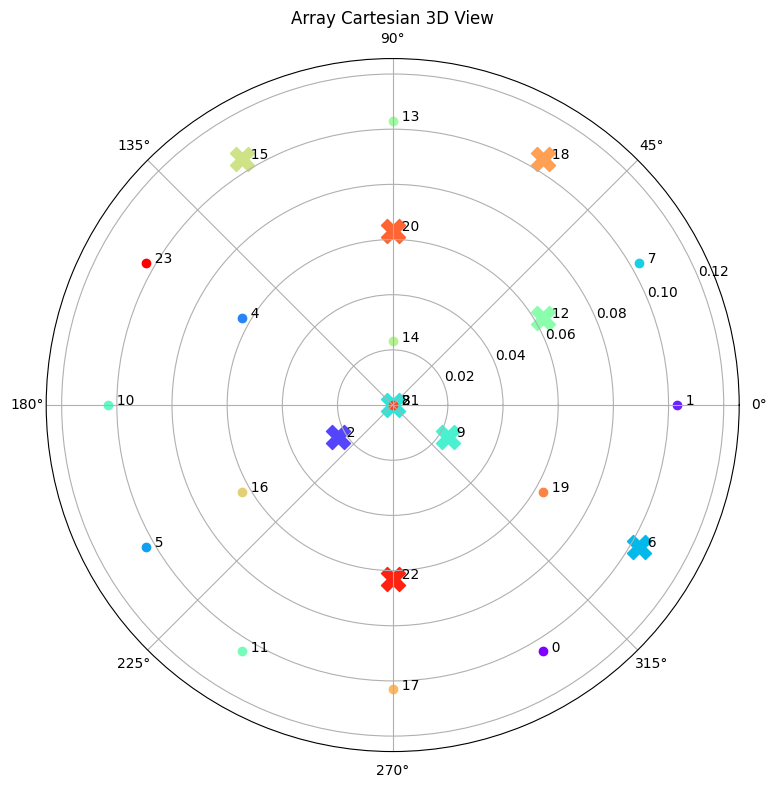

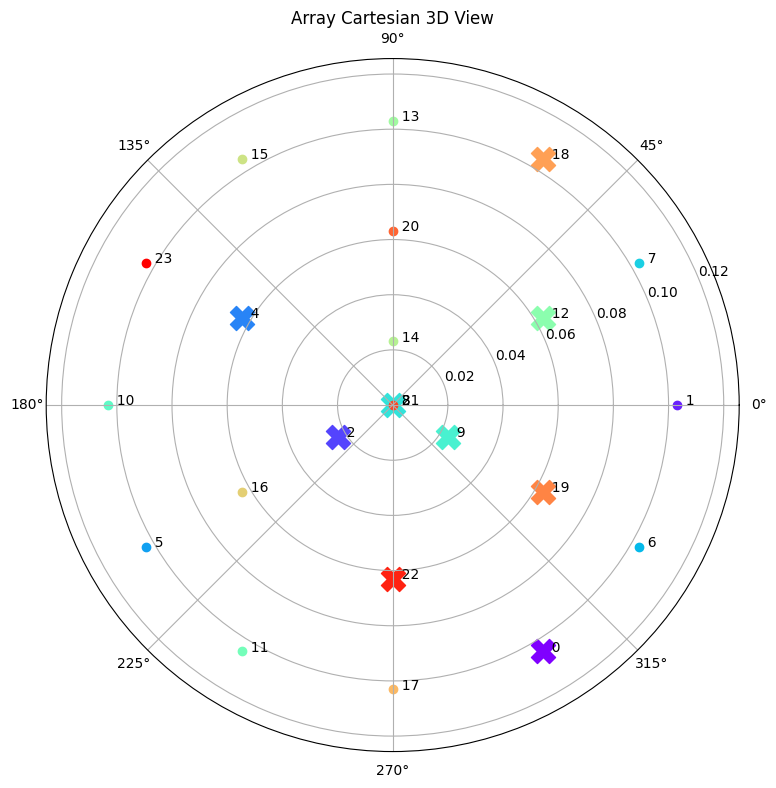

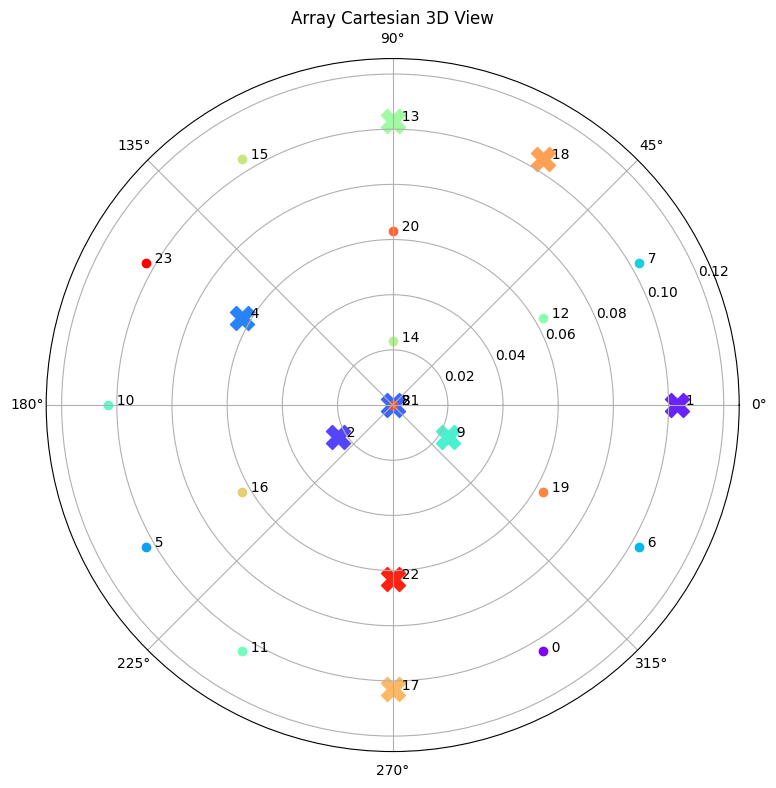

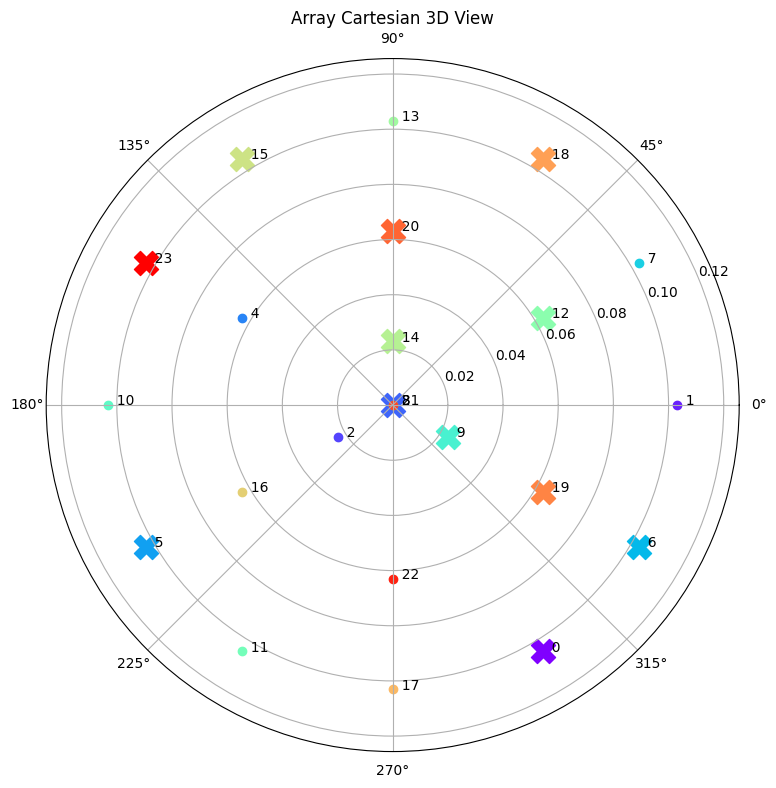

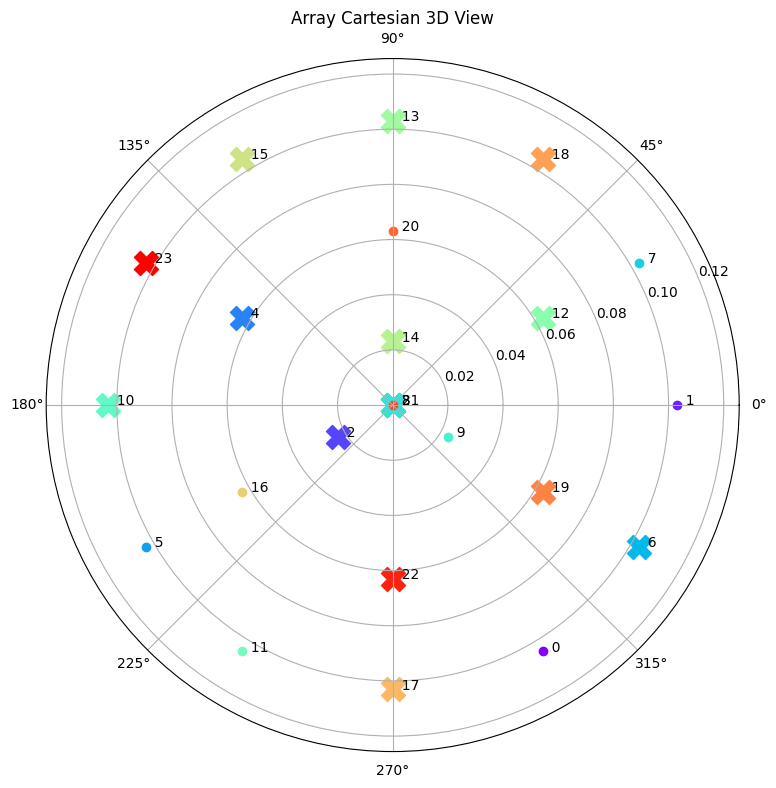

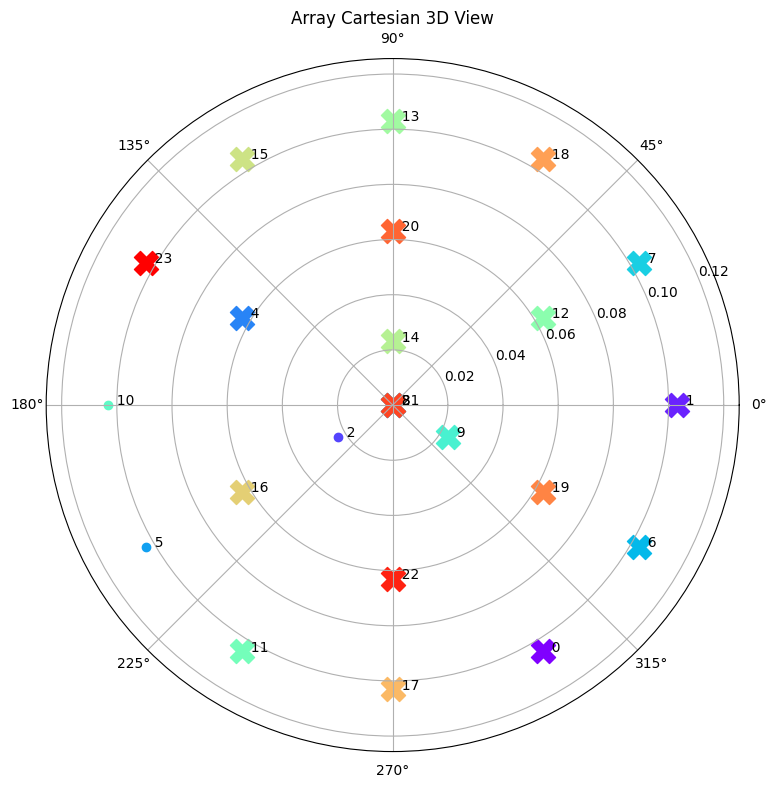

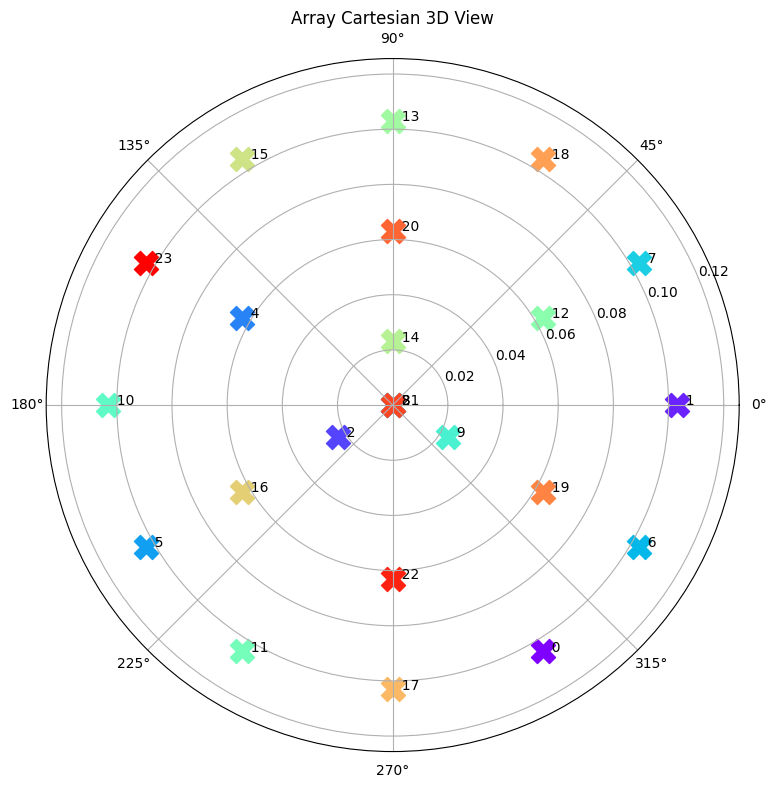

In [100]:
for channels in top_list_channels:
    visualizer.polar(fig_size=(10,9), channels = channels)

2025-03-31 21:00:24.557164: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/tmp/ipykernel_2556863/128754474.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt .subplots(ncols = 3, nrows=1, figsize=(12,3), layout="constrained")


[[0.0007597552612423897, 2.4961202144622803, 0.9948858618736267],
 [7.342242315644398e-05, 0.24124181270599365, 0.17401503026485443],
 [4.230384365655482e-05, 0.13887909054756165, 0.27456796169281006],
 [0.009773202240467072, 463.618896484375, 4.609789848327637],
 [0.01668412610888481, 1359.190185546875, 6.343809127807617],
 [0.00864870473742485, 462.2003173828125, 2.9385766983032227],
 [0.024519087746739388, 1782.41162109375, 10.435765266418457],
 [0.00828613806515932, 27.276220321655273, 3.5413684844970703],
 [0.048646628856658936, 1753.4979248046875, 11.992879867553711],
 [0.02377367950975895, 1773.438720703125, 11.768706321716309],
 [0.0004608338640537113, 431.2286376953125, 2.1067681312561035],
 [0.014412924647331238, 1352.849365234375, 5.8056640625],
 [3.5366727388463914e-05, 0.1161278560757637, 0.19501423835754395],
 [0.005283333361148834, 446.6393127441406, 4.445150375366211],
 [0.0018737995997071266, 435.8577880859375, 2.4870710372924805]]

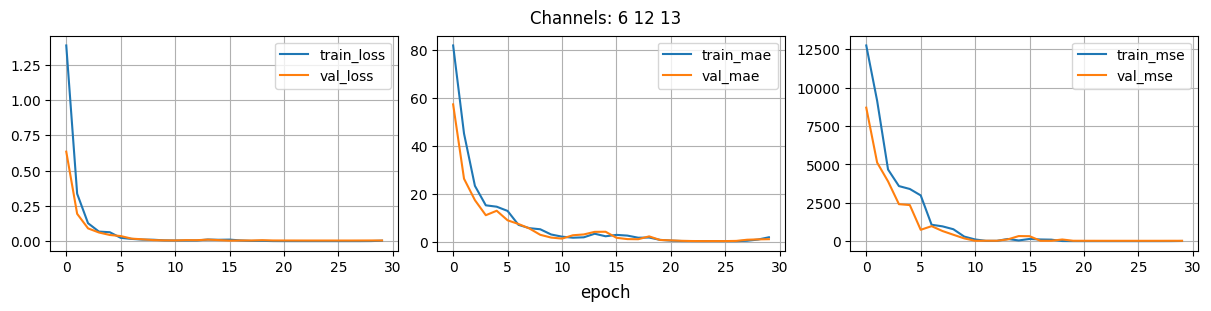

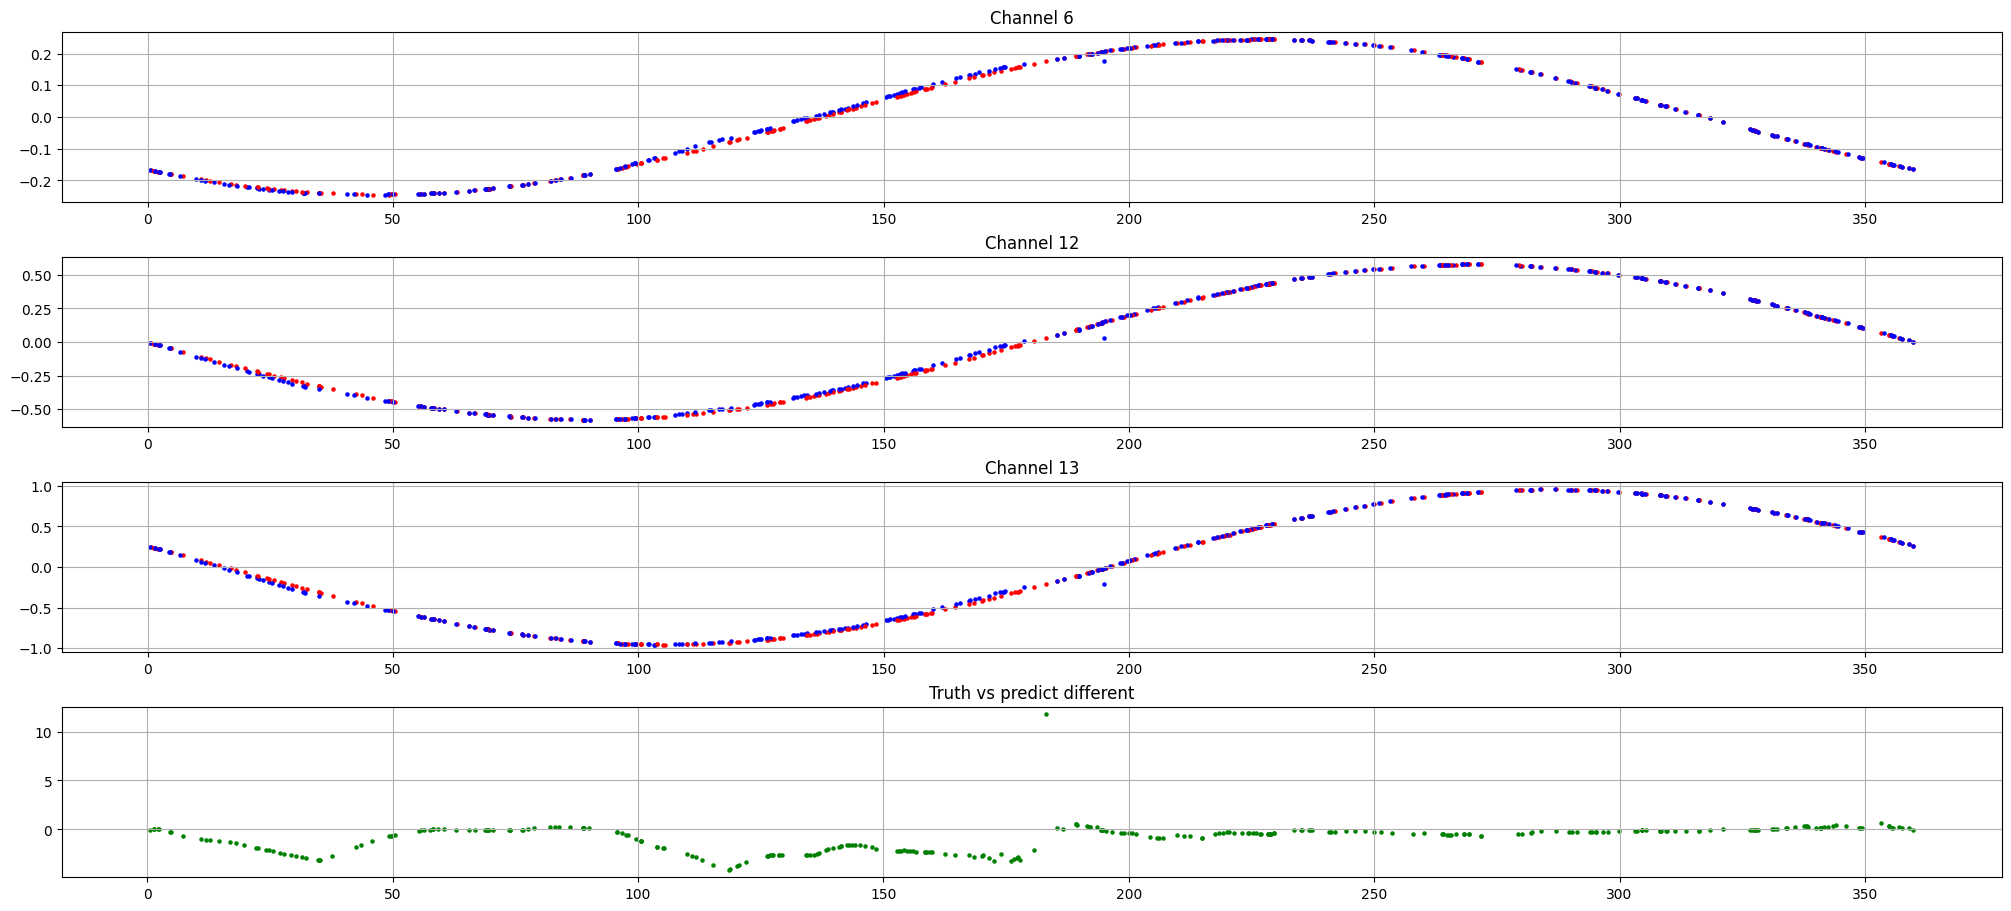

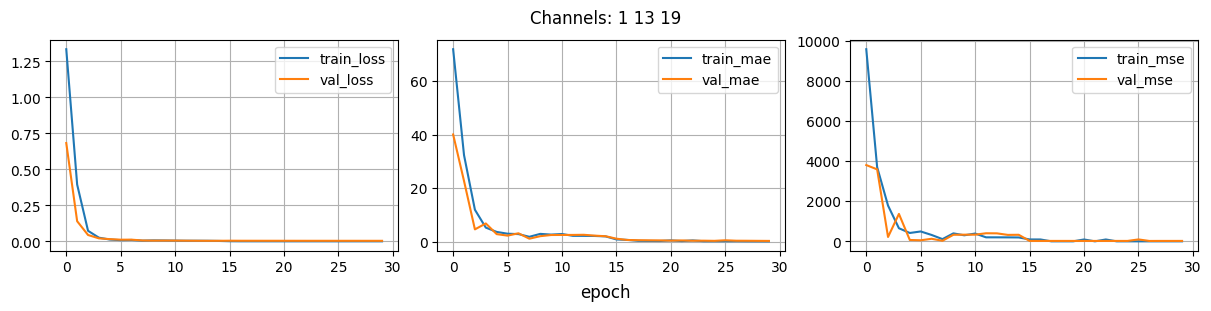

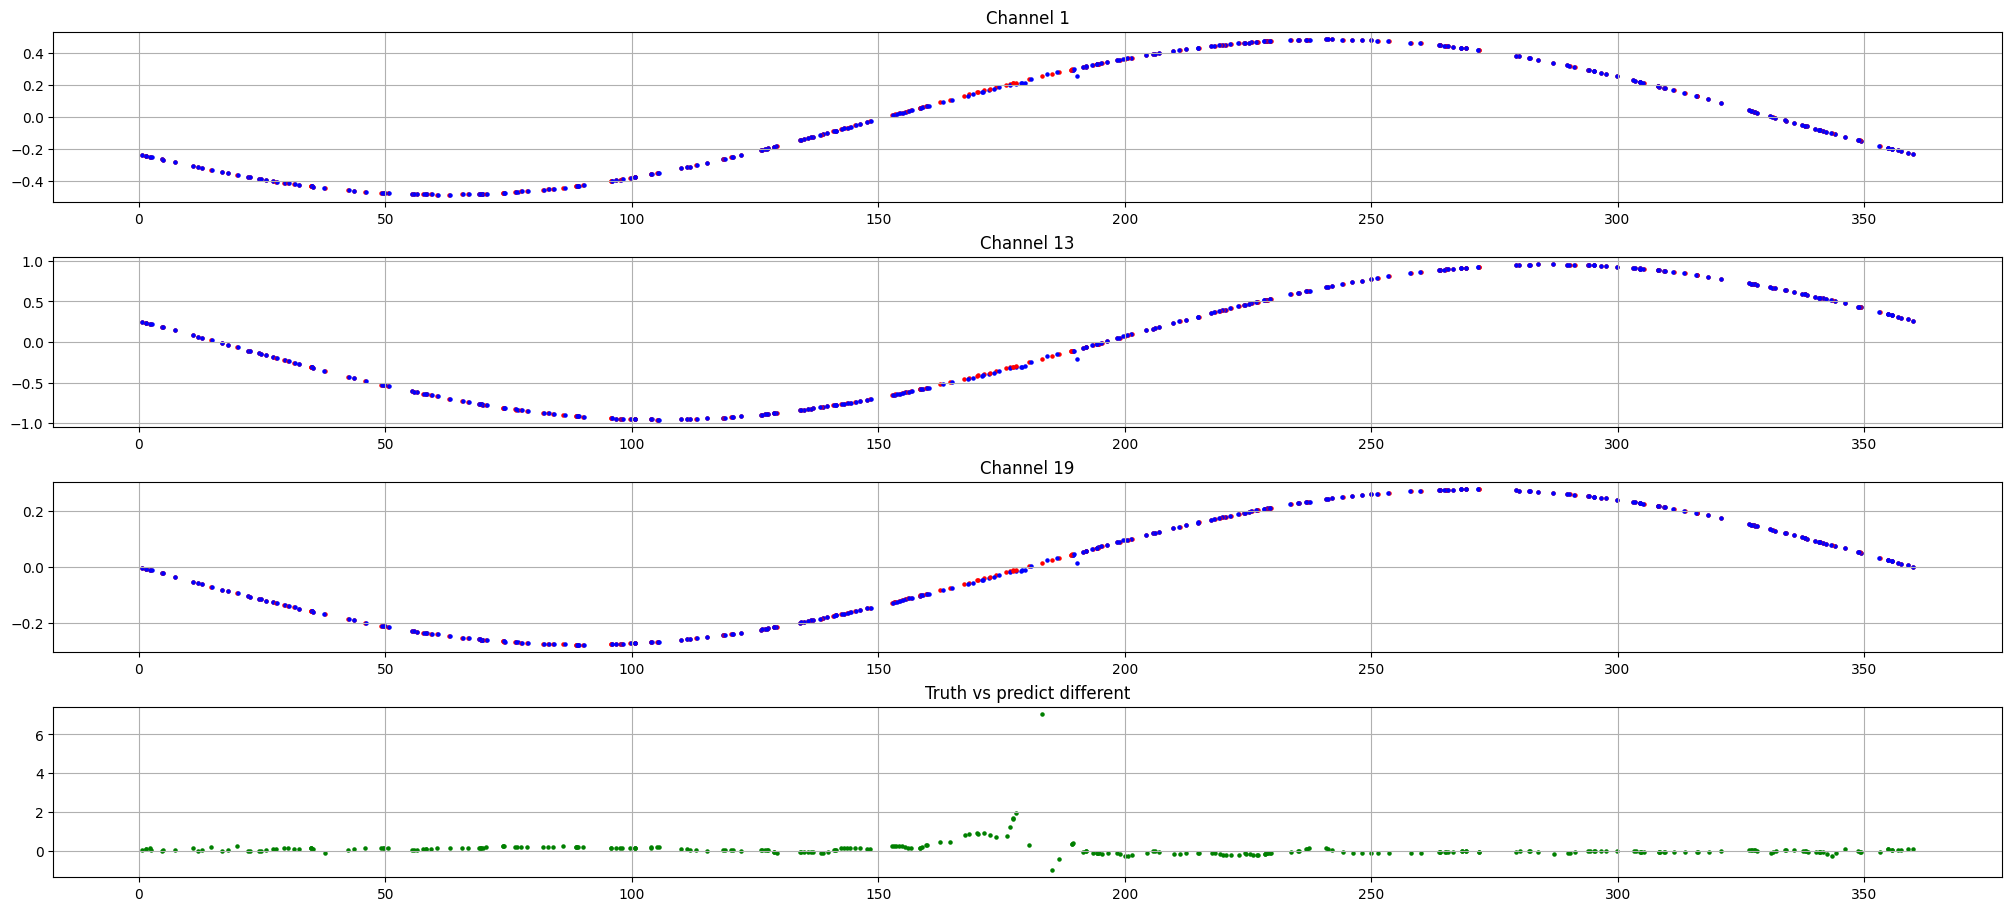

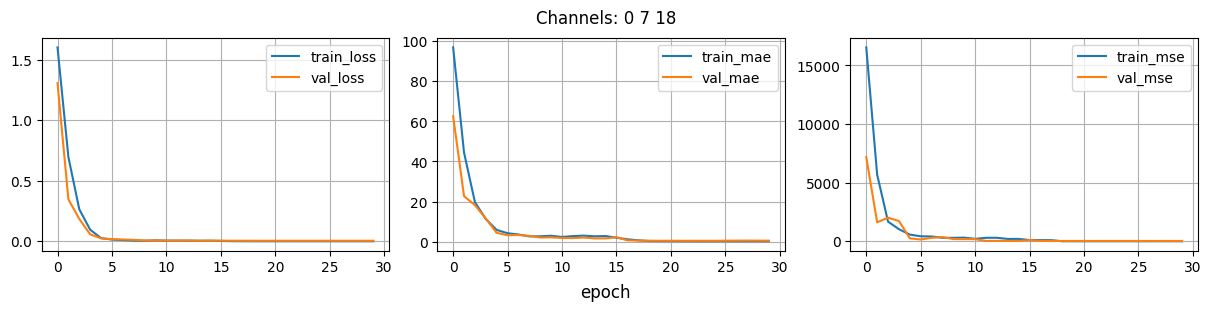

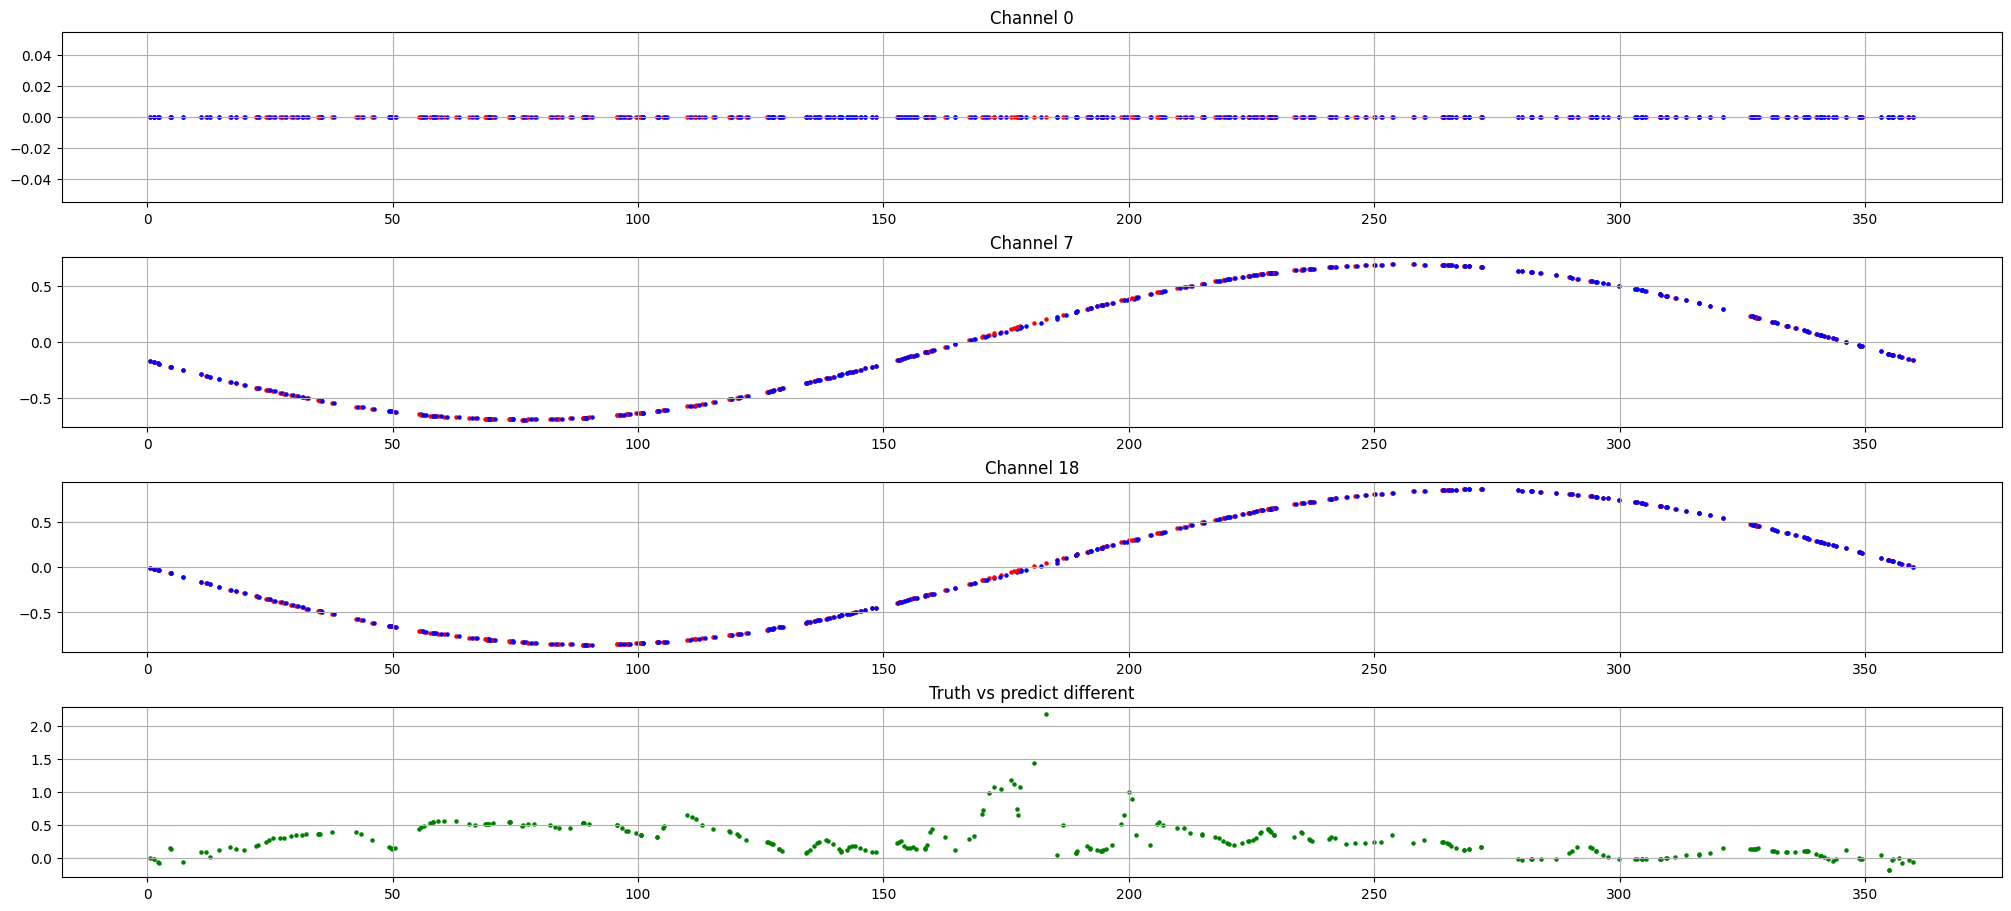

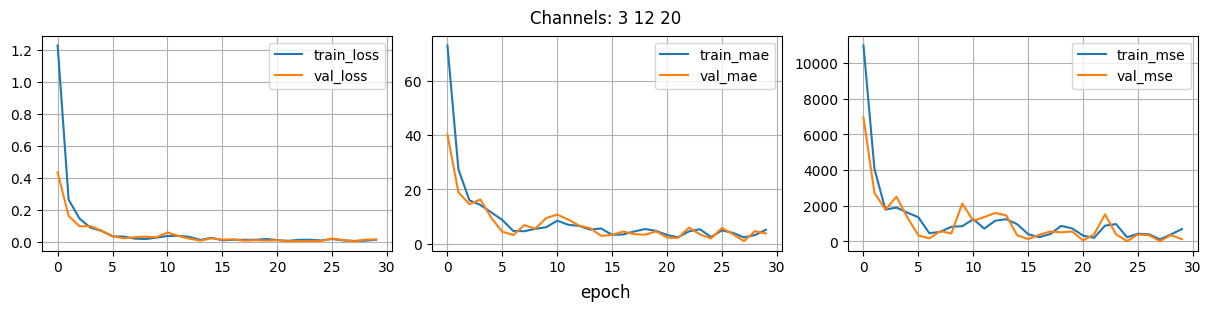

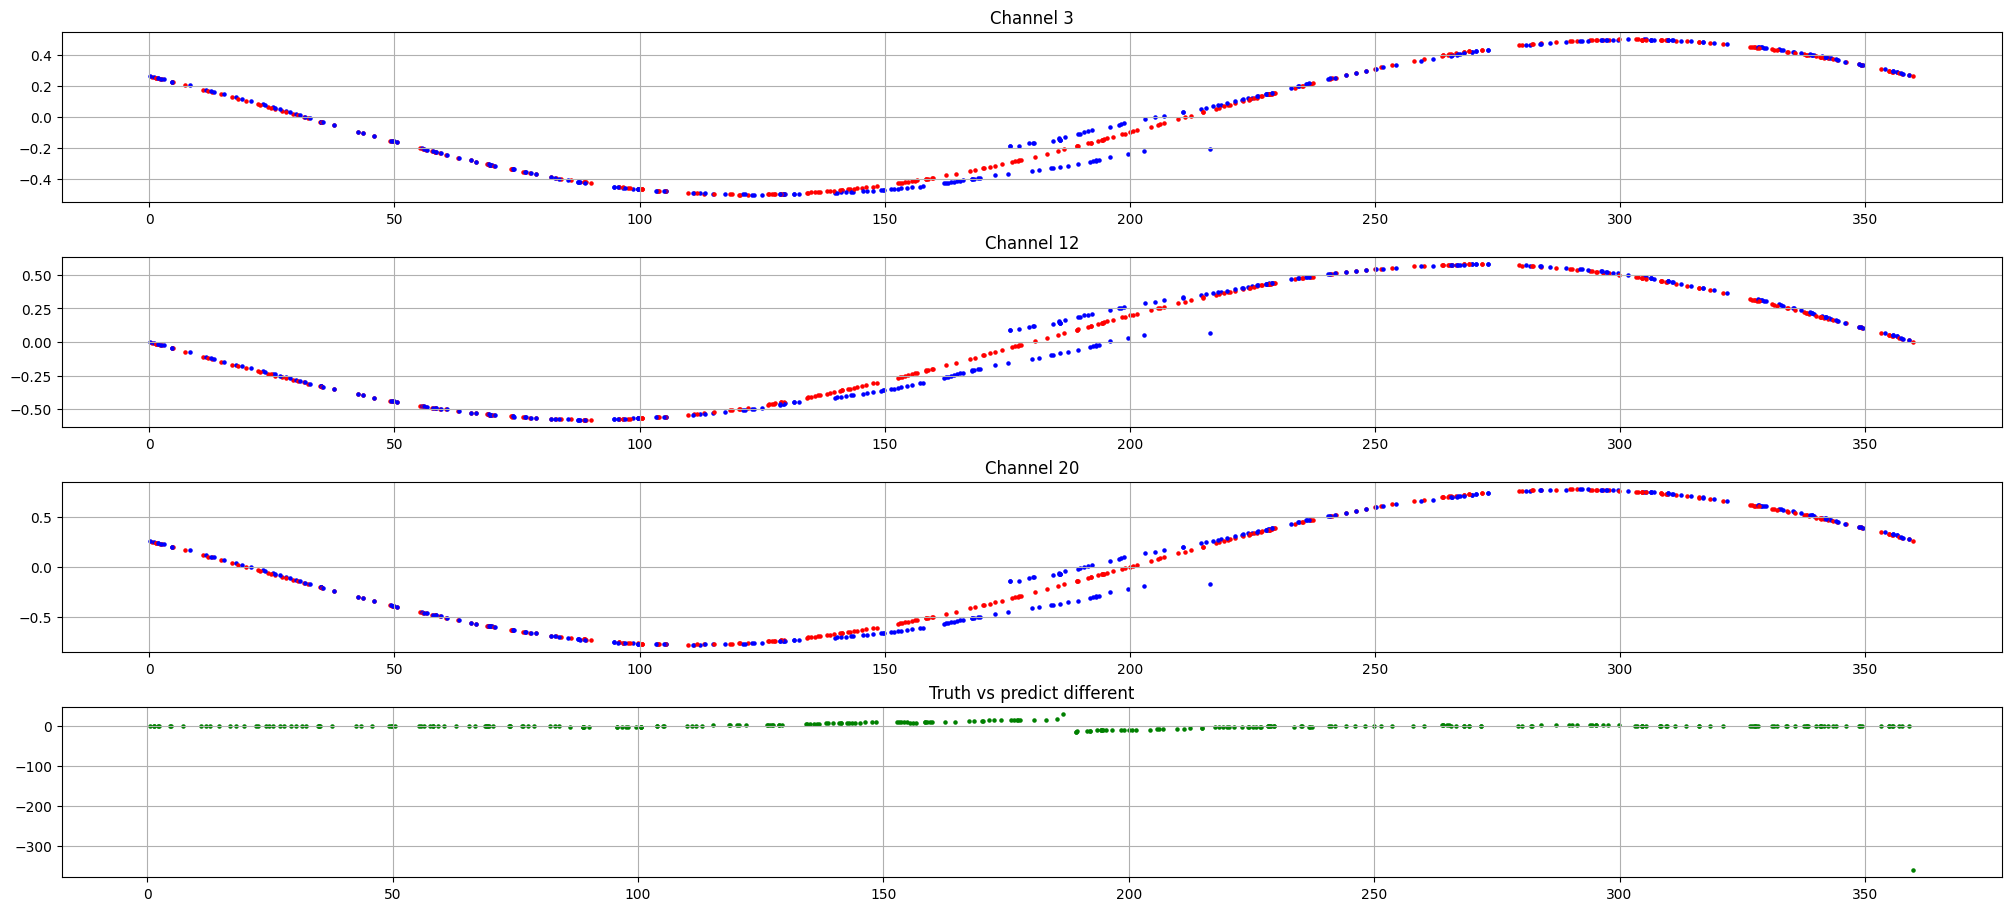

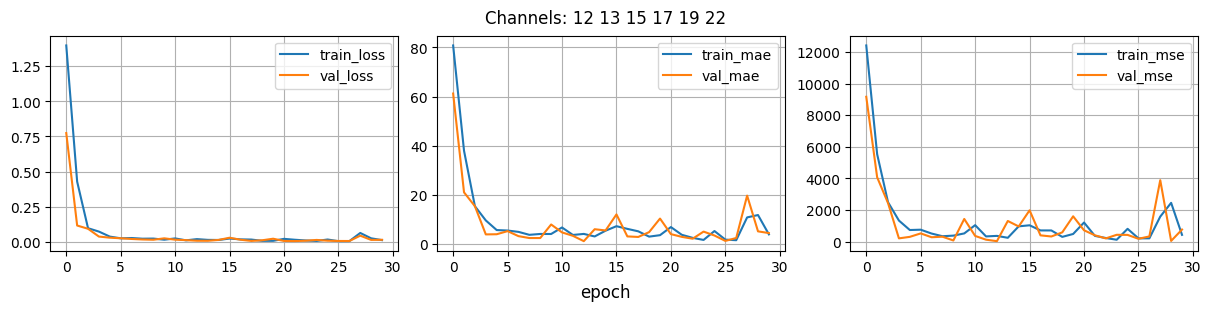

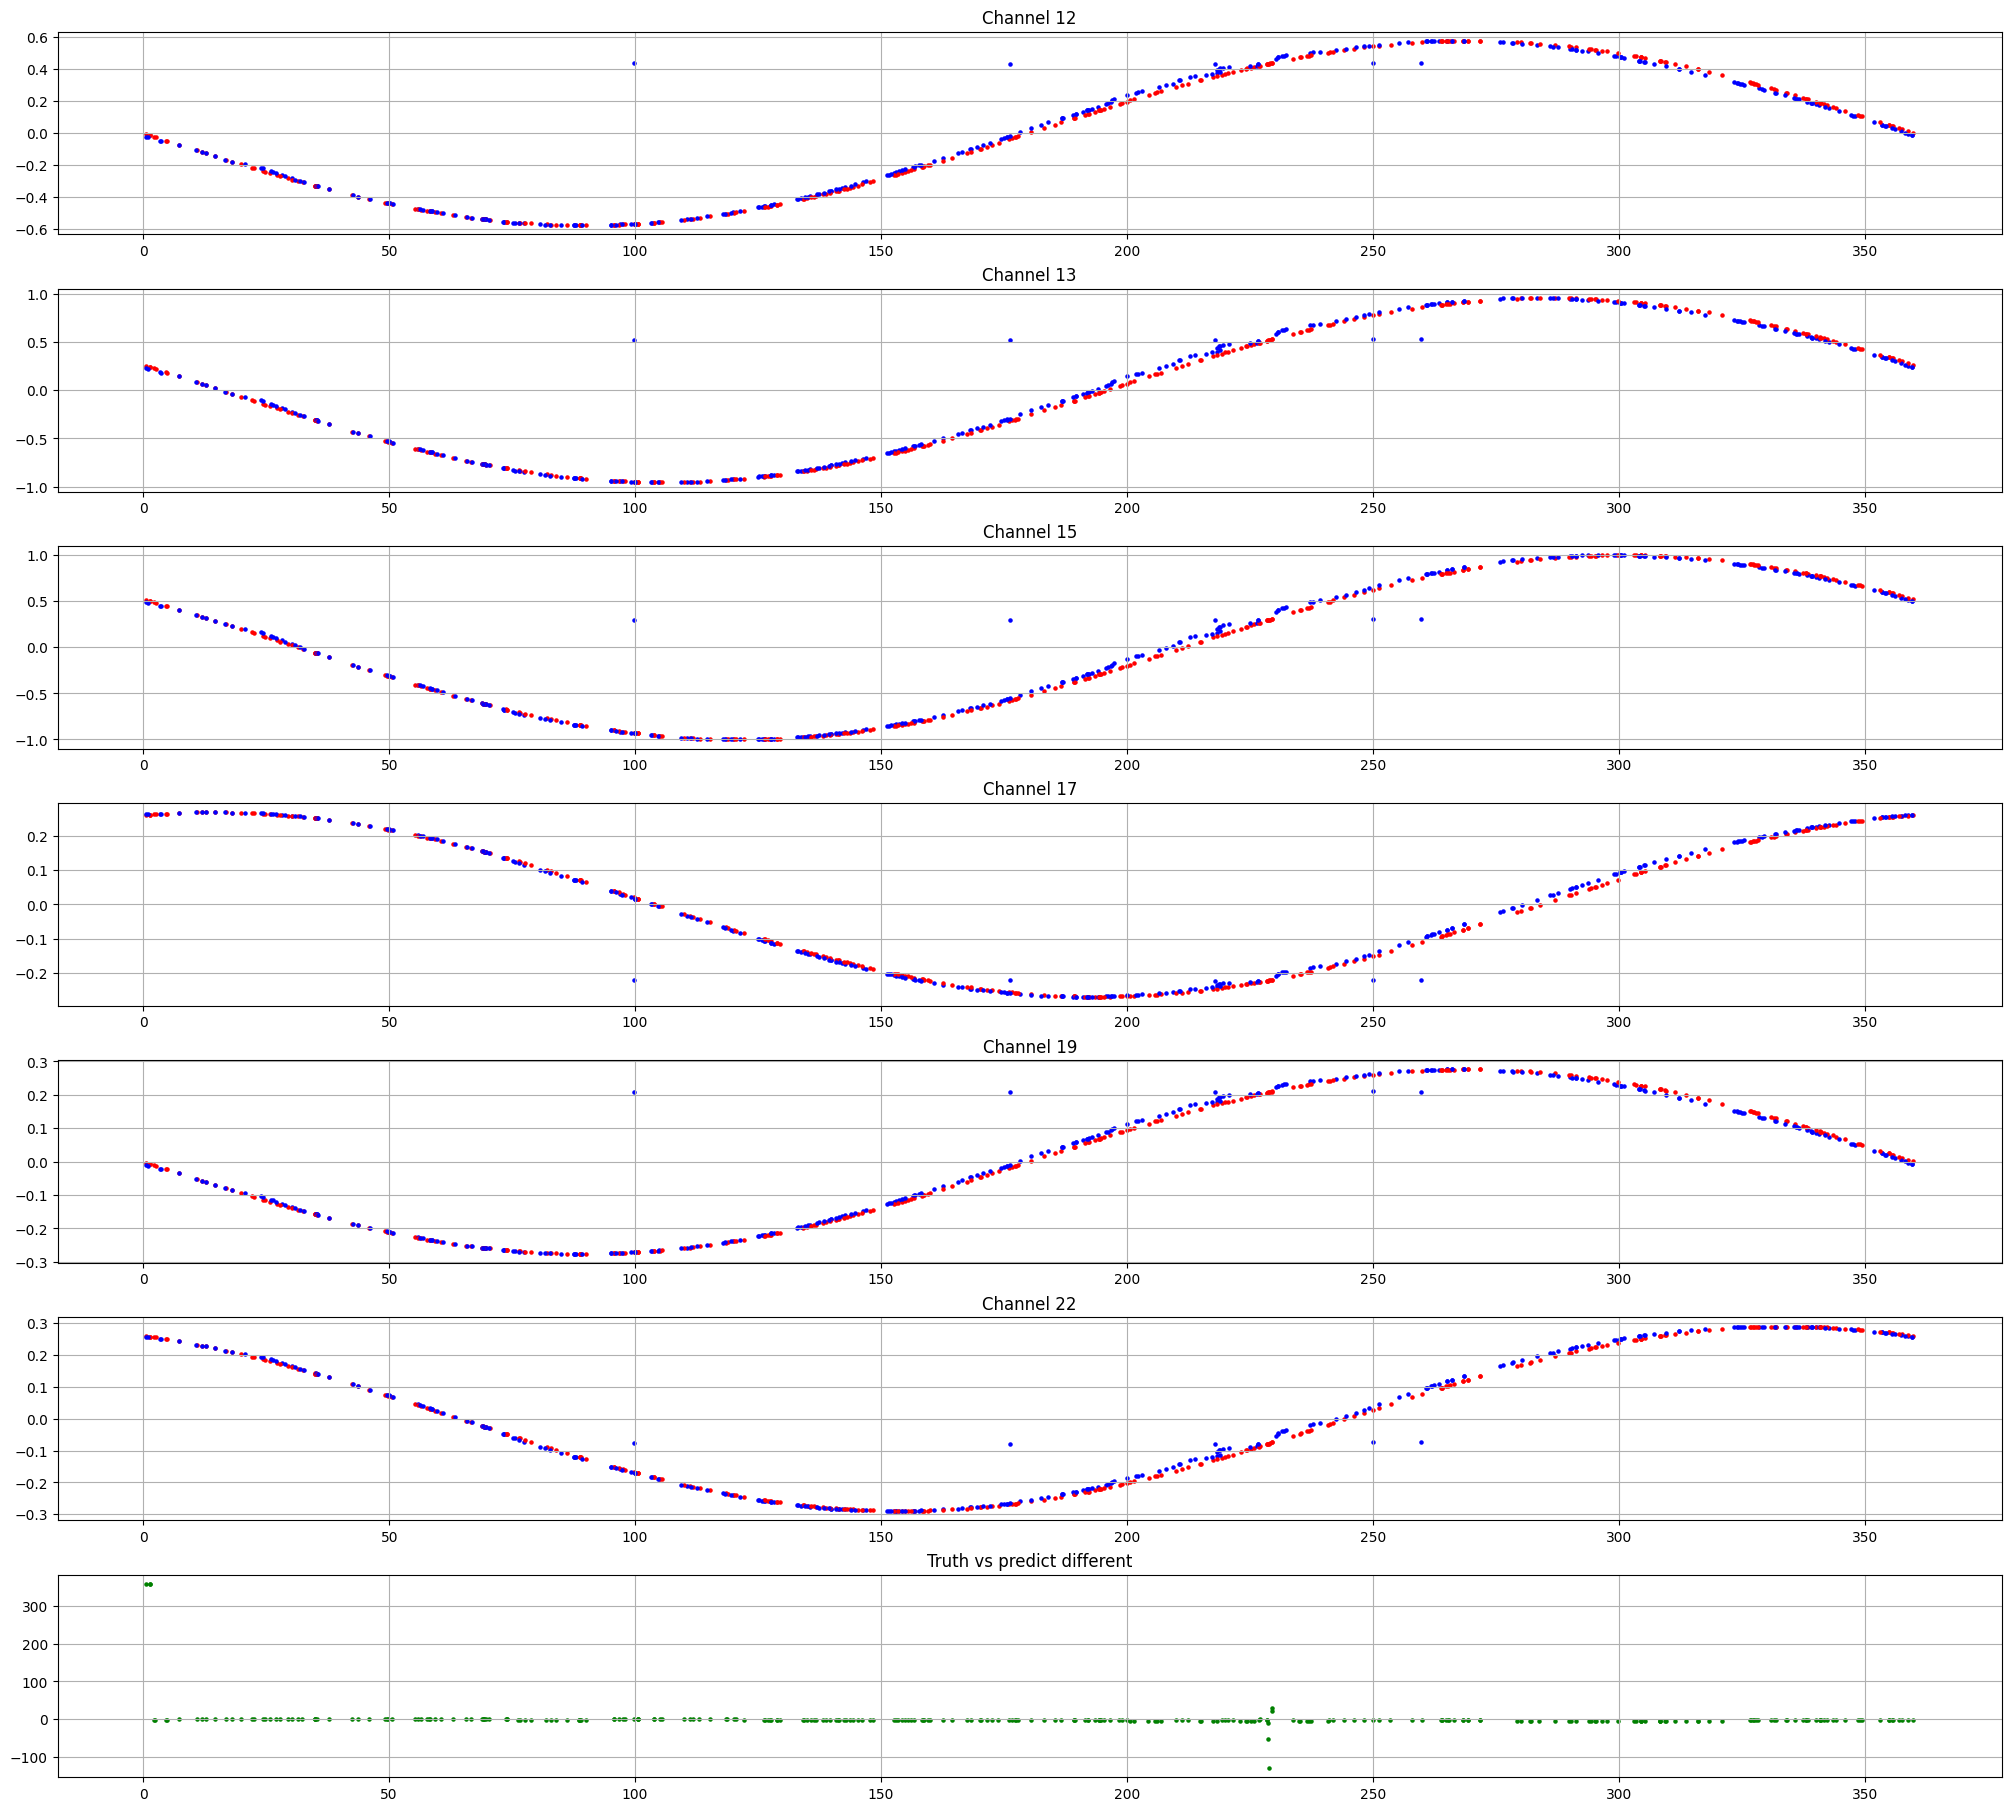

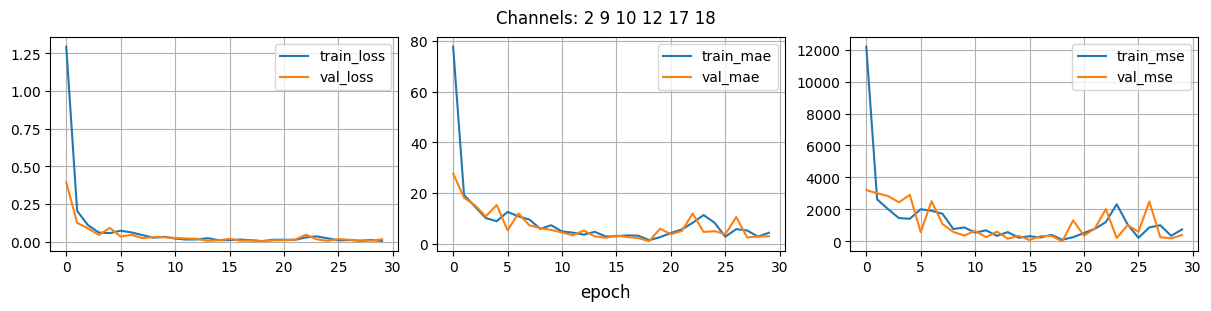

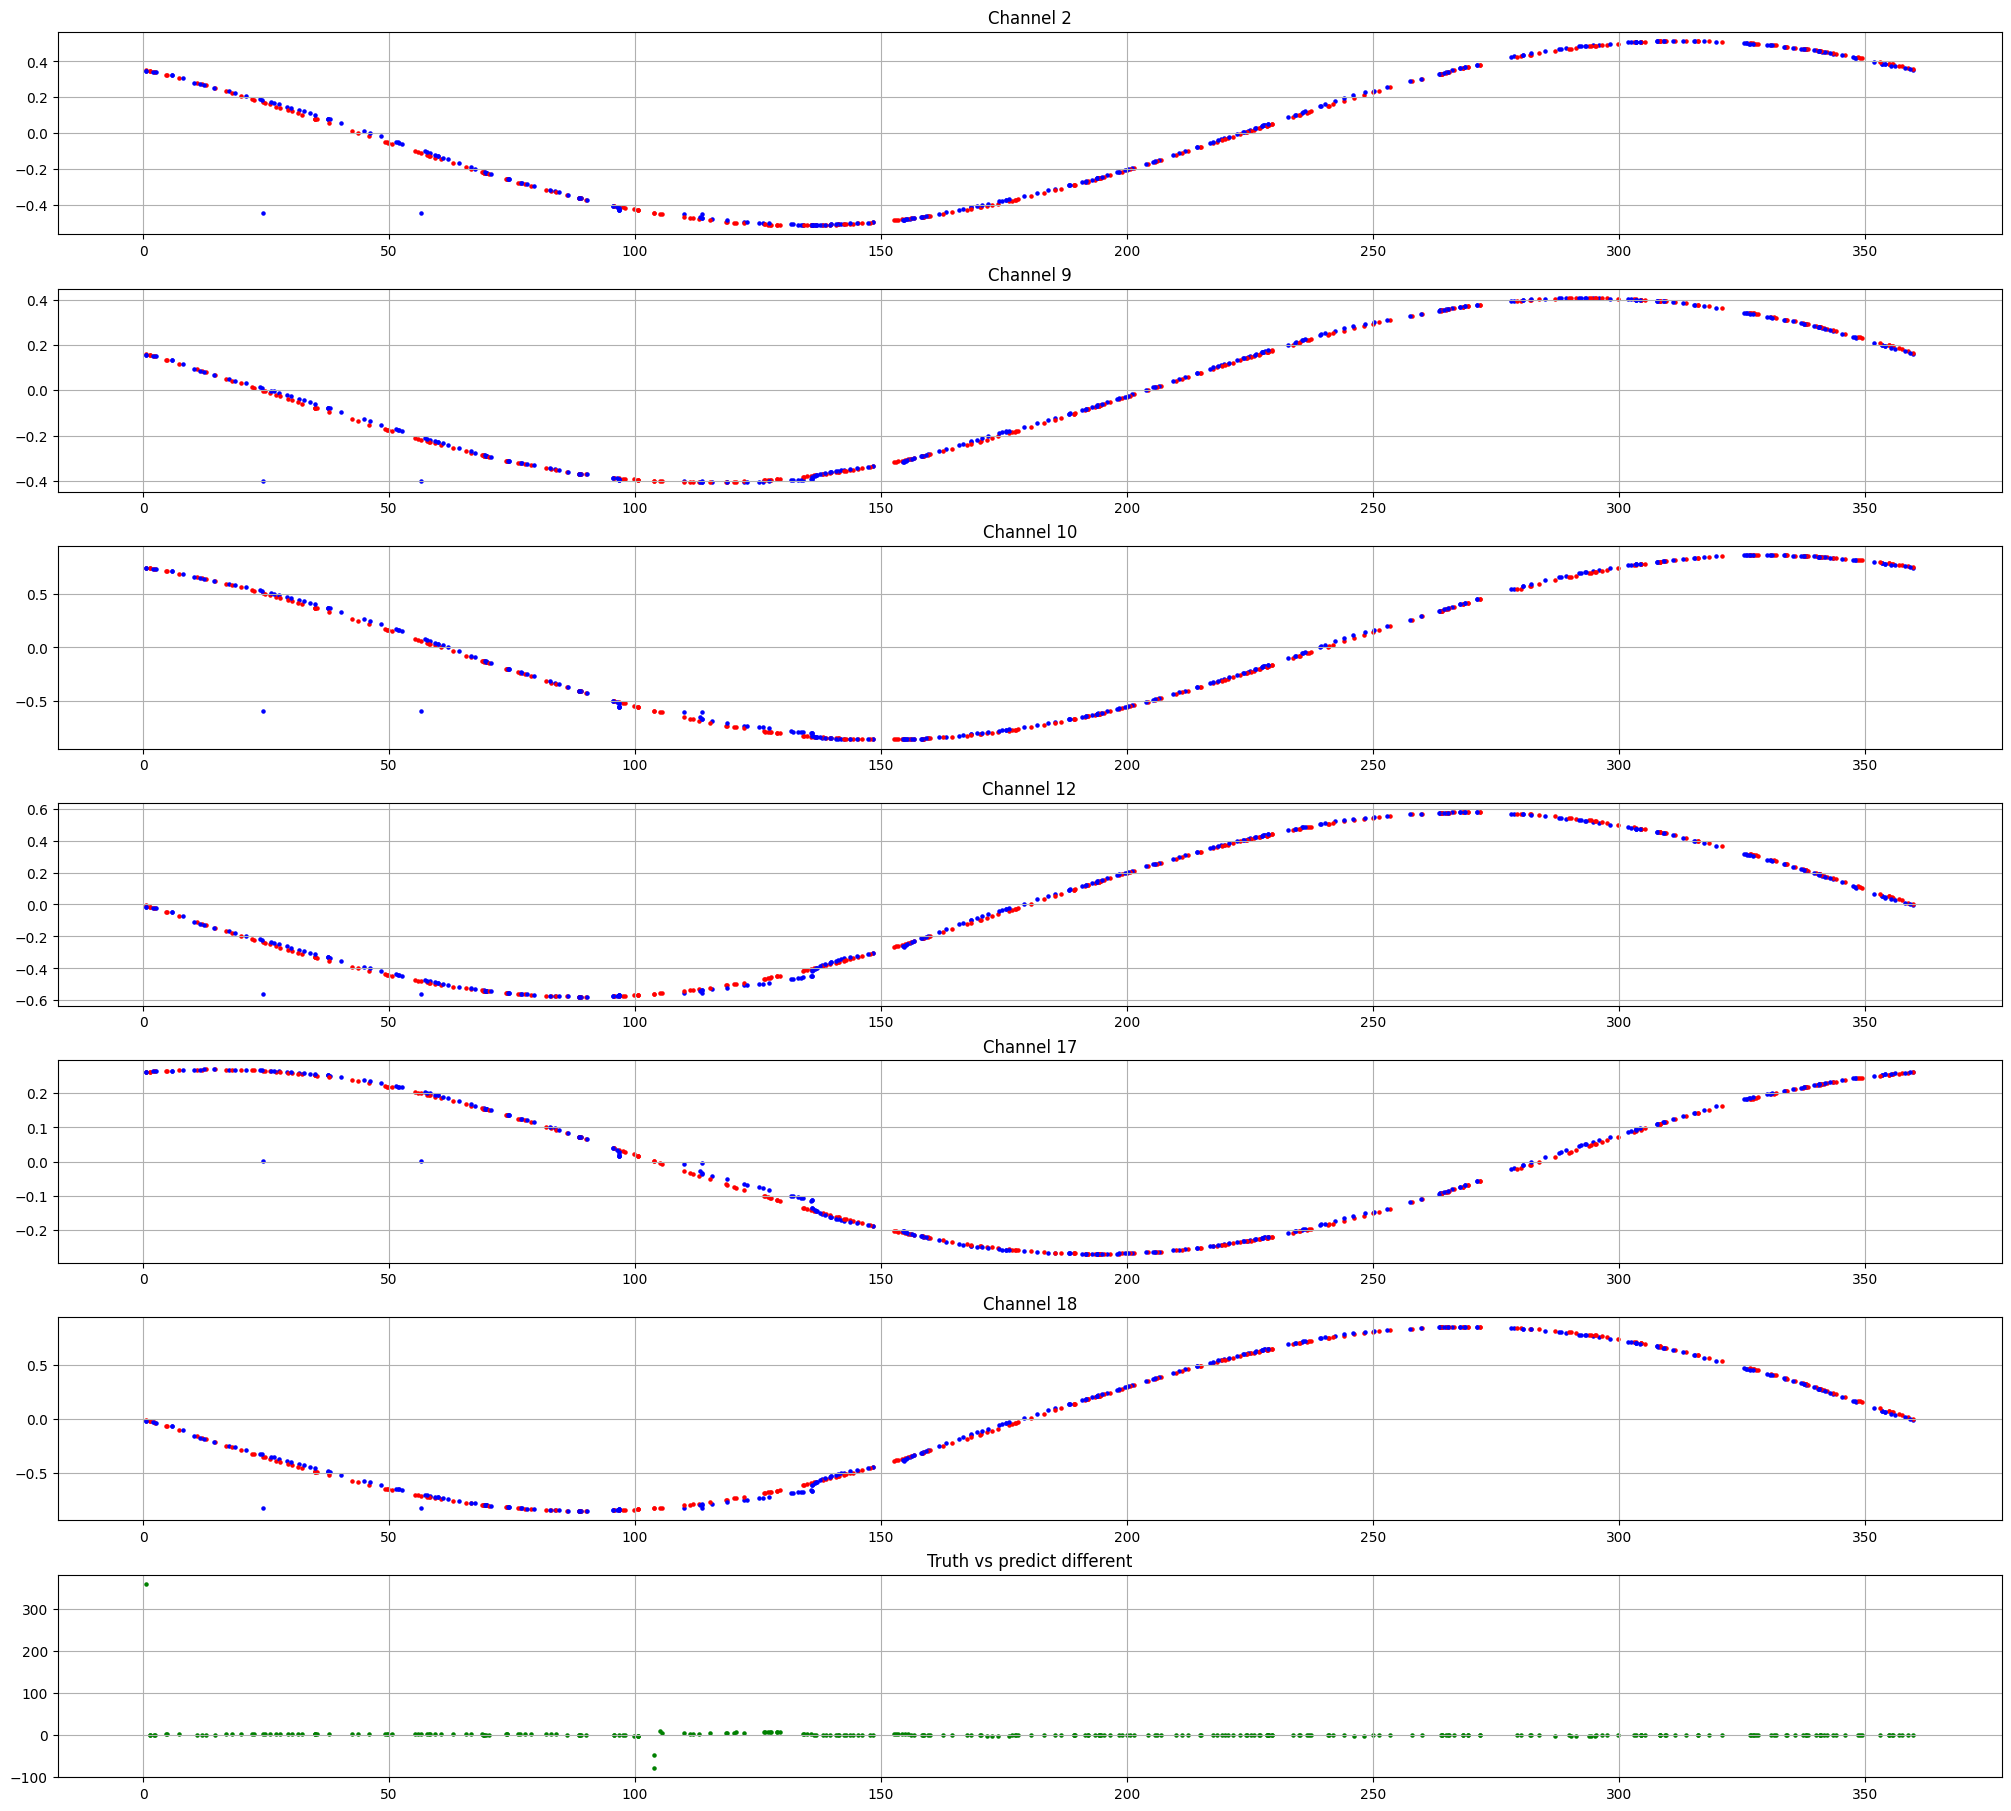

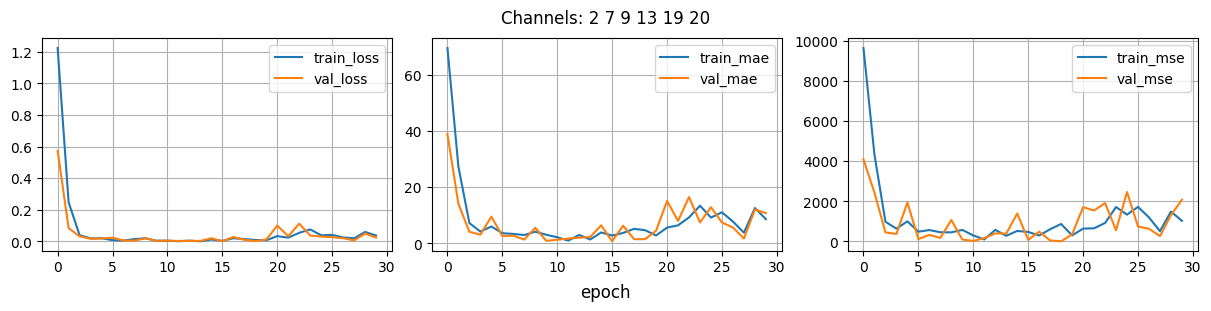

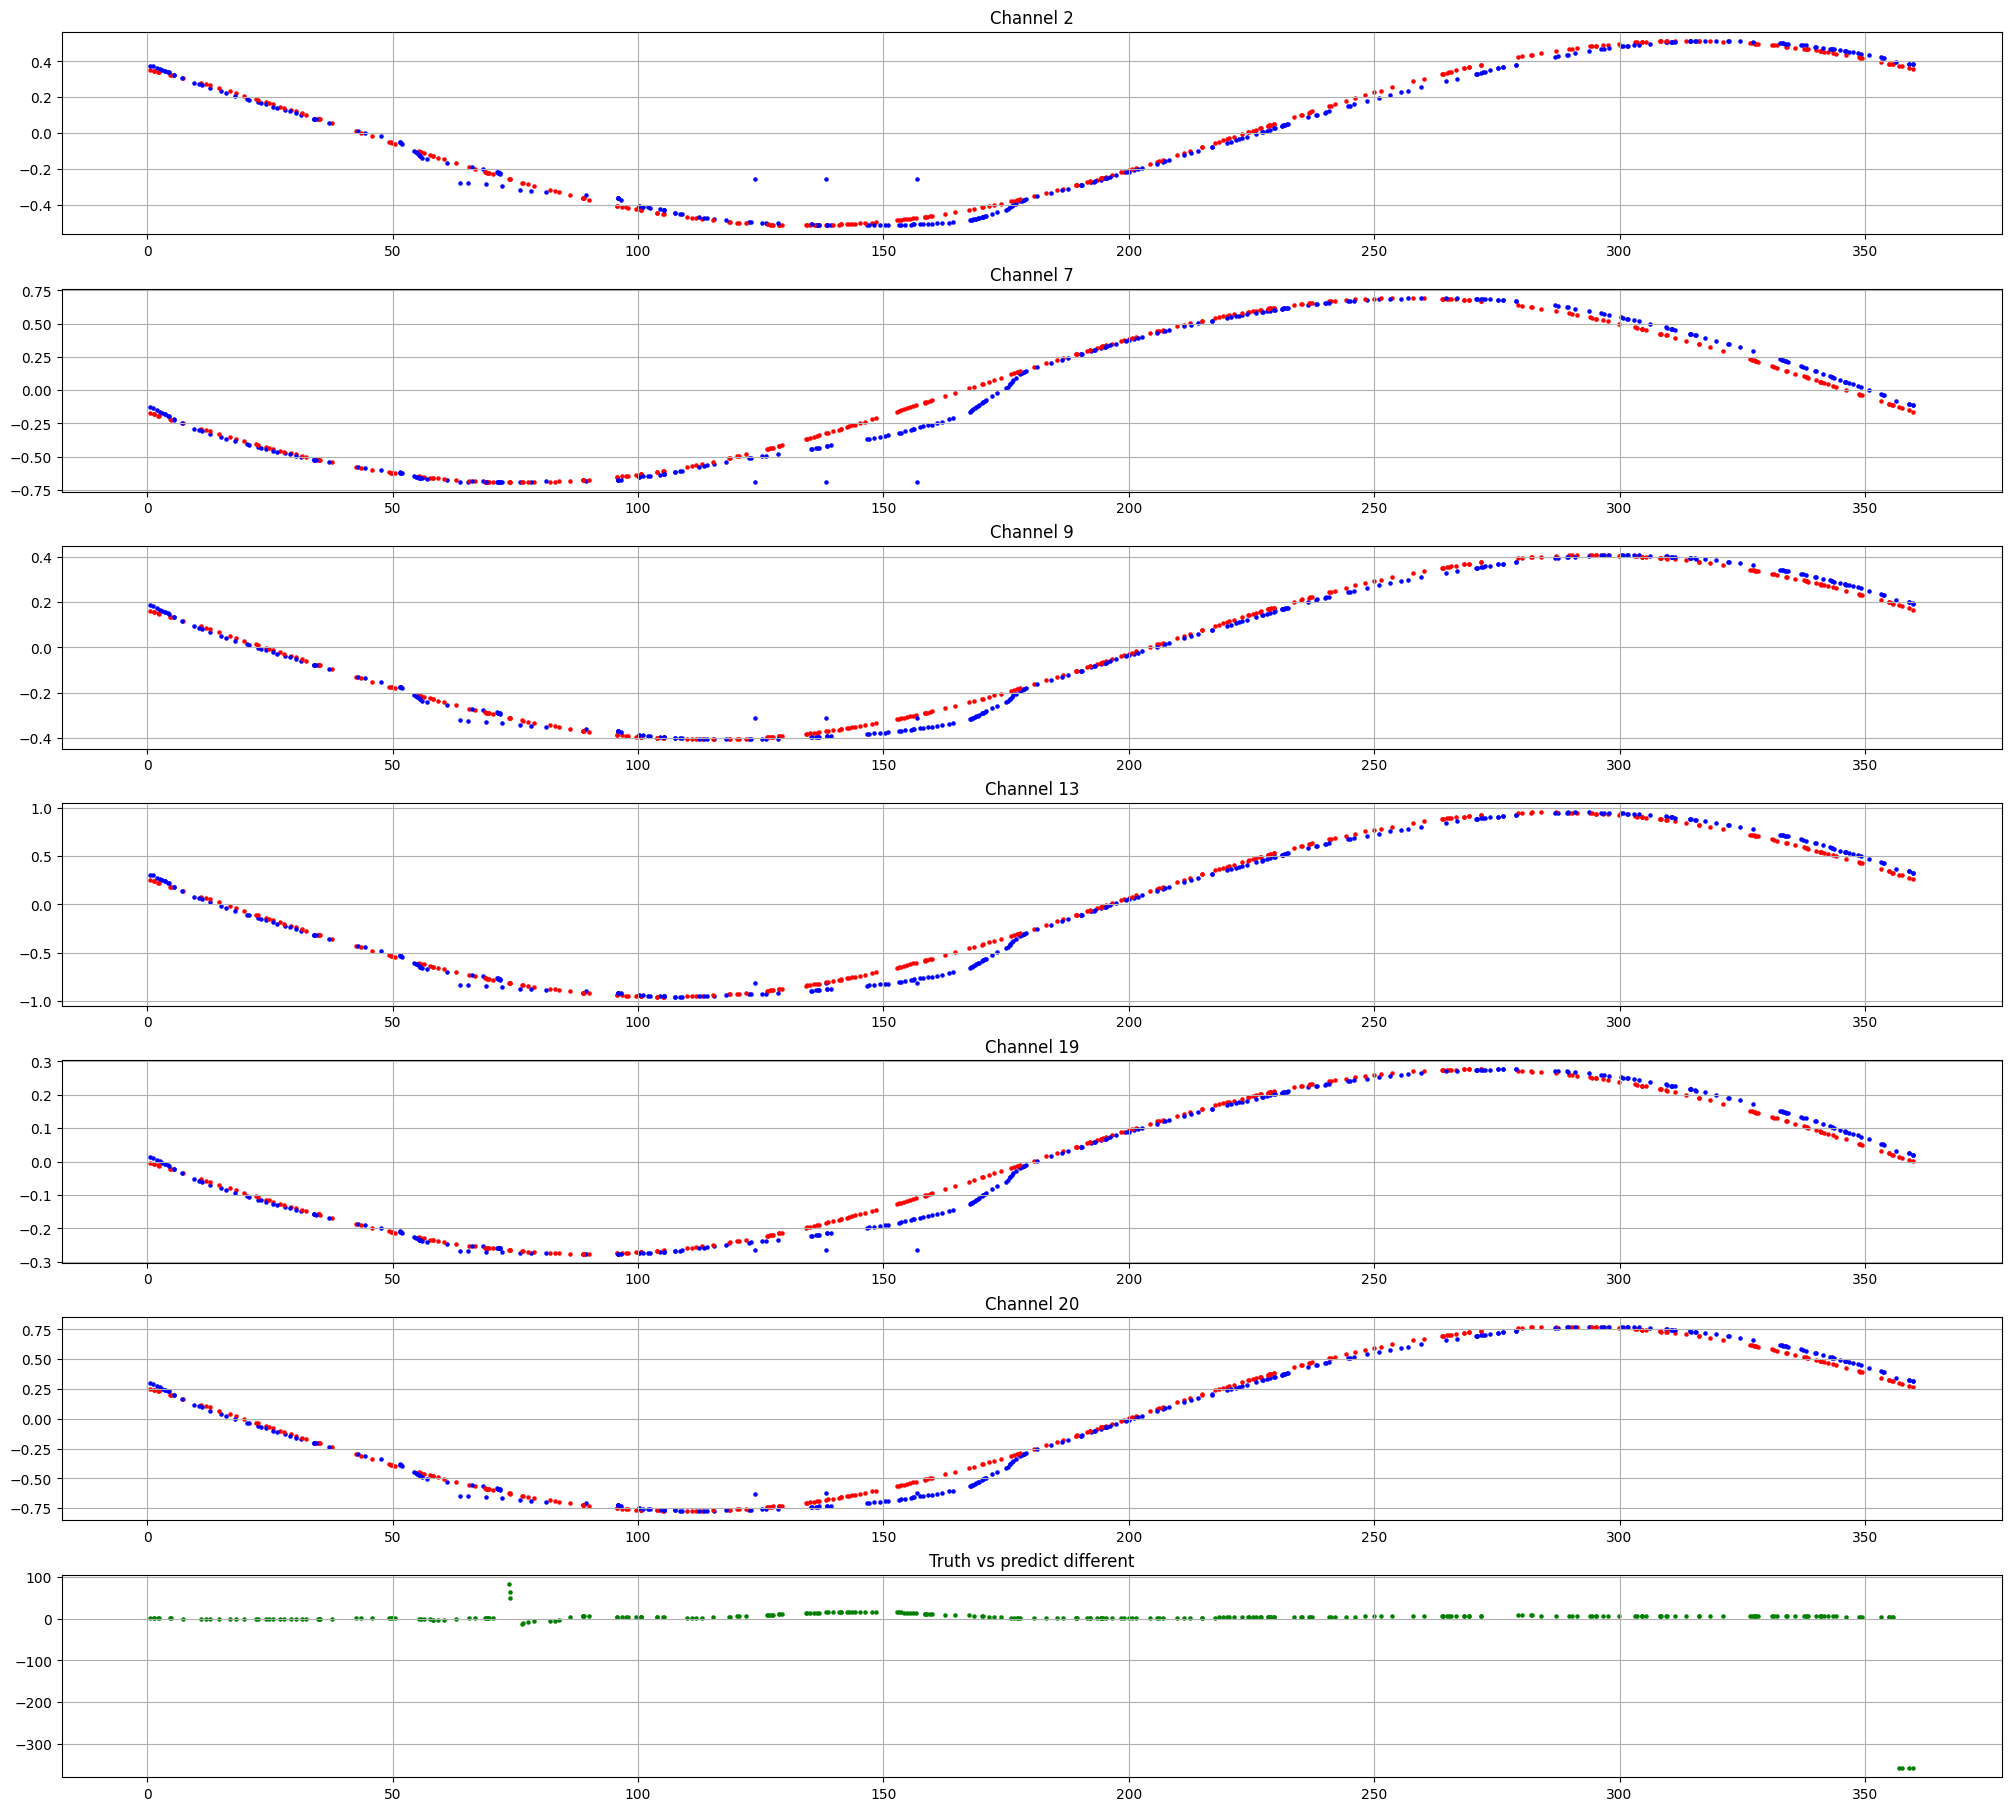

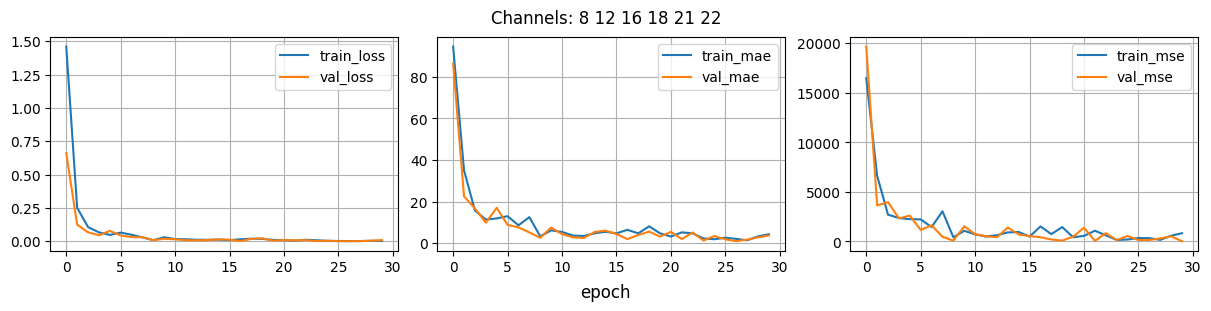

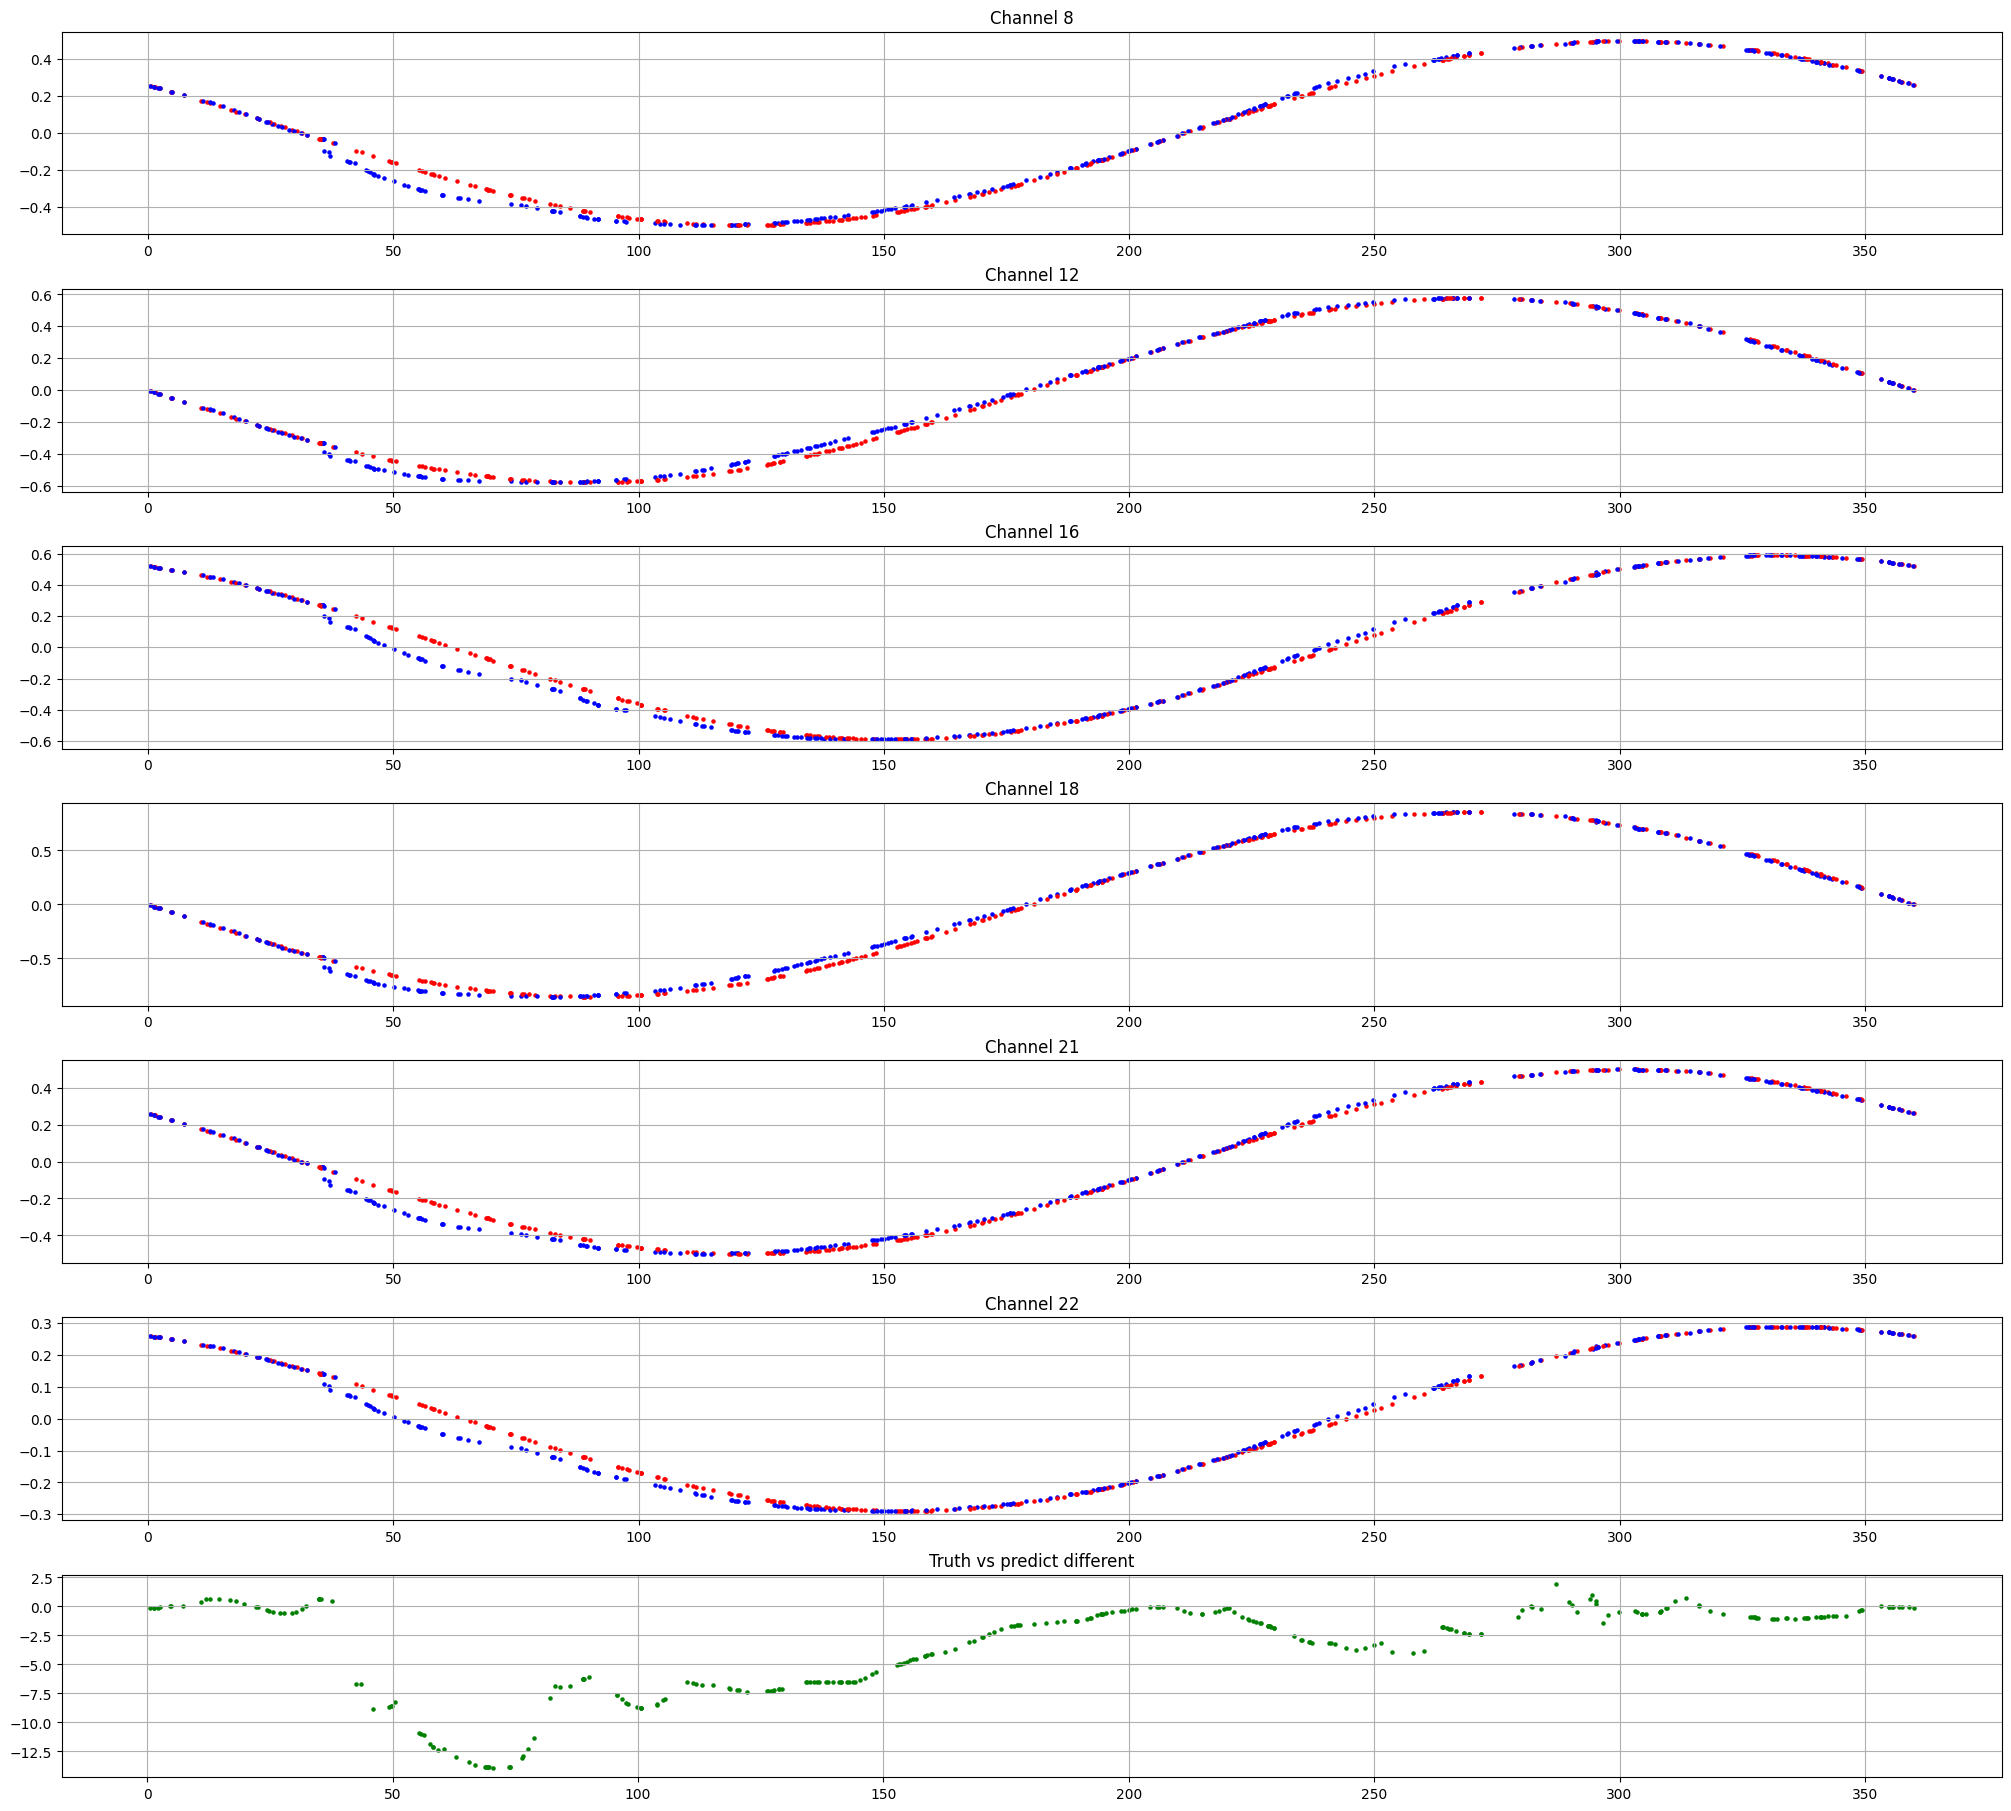

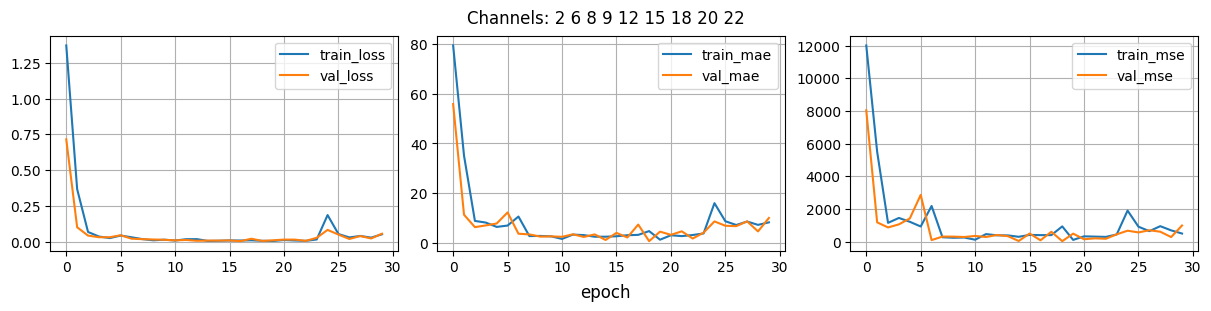

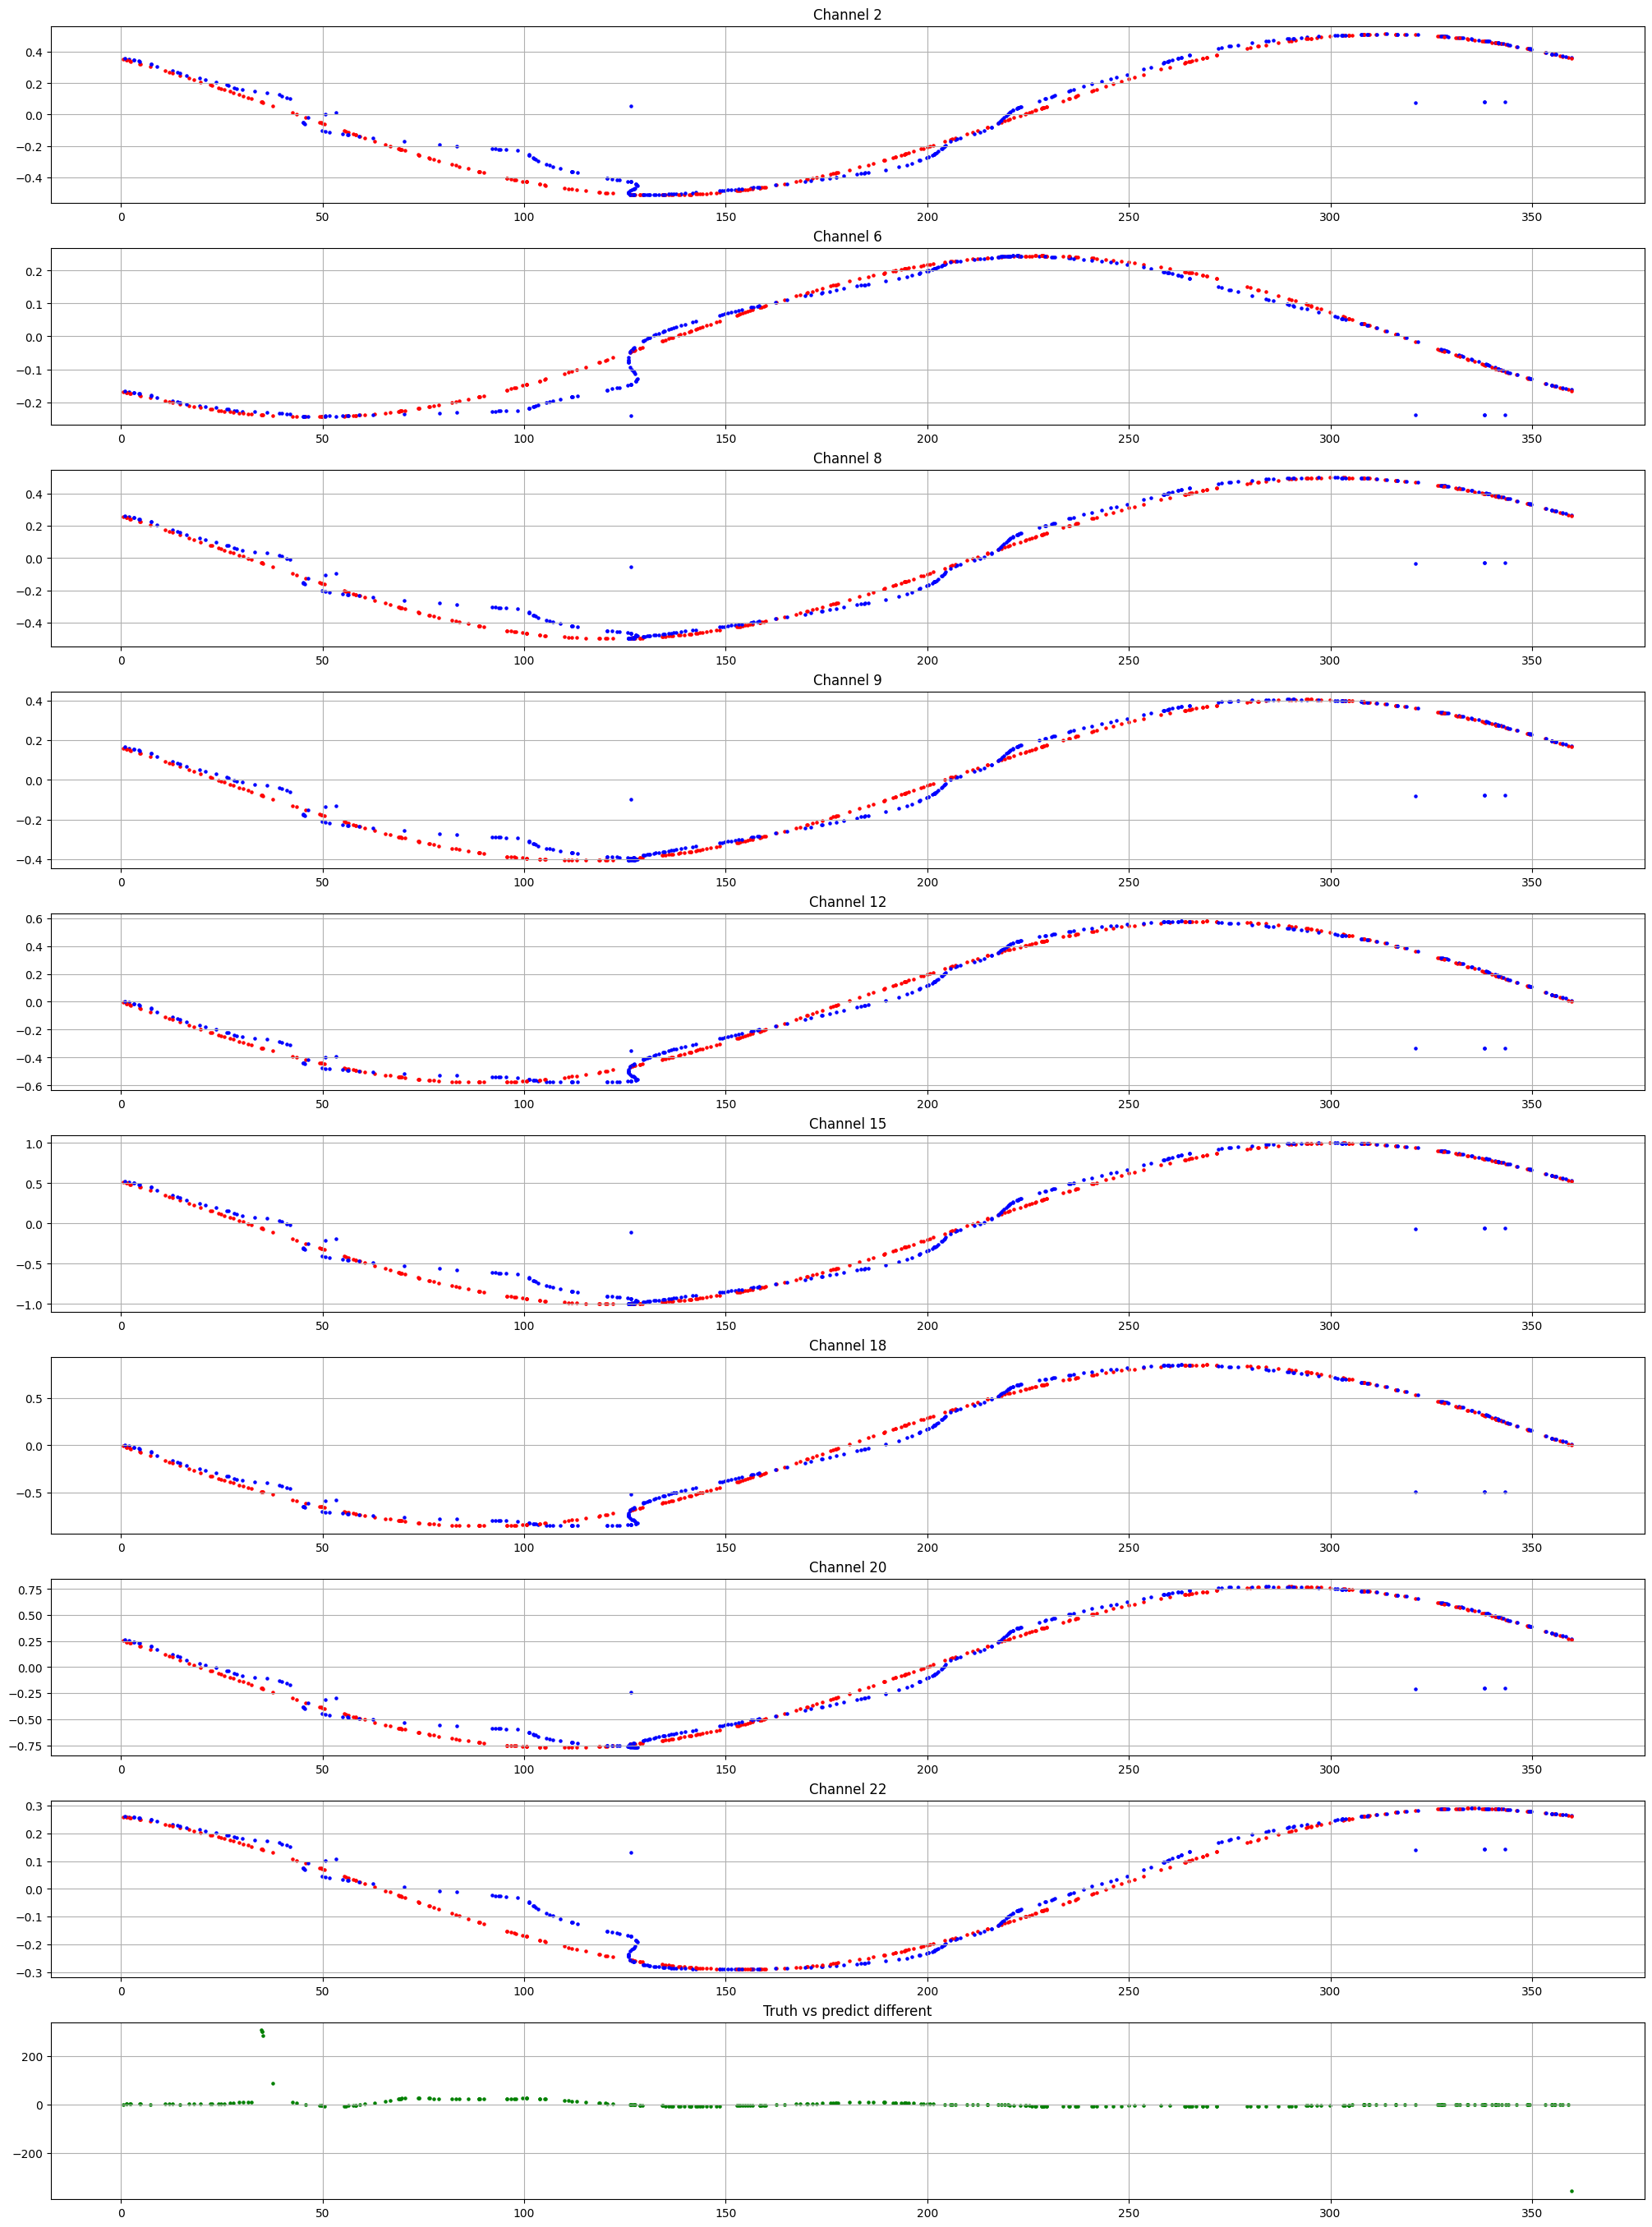

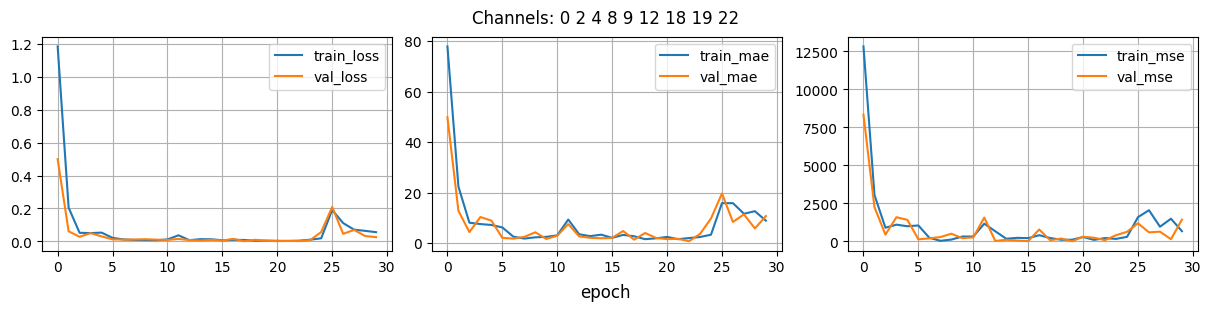

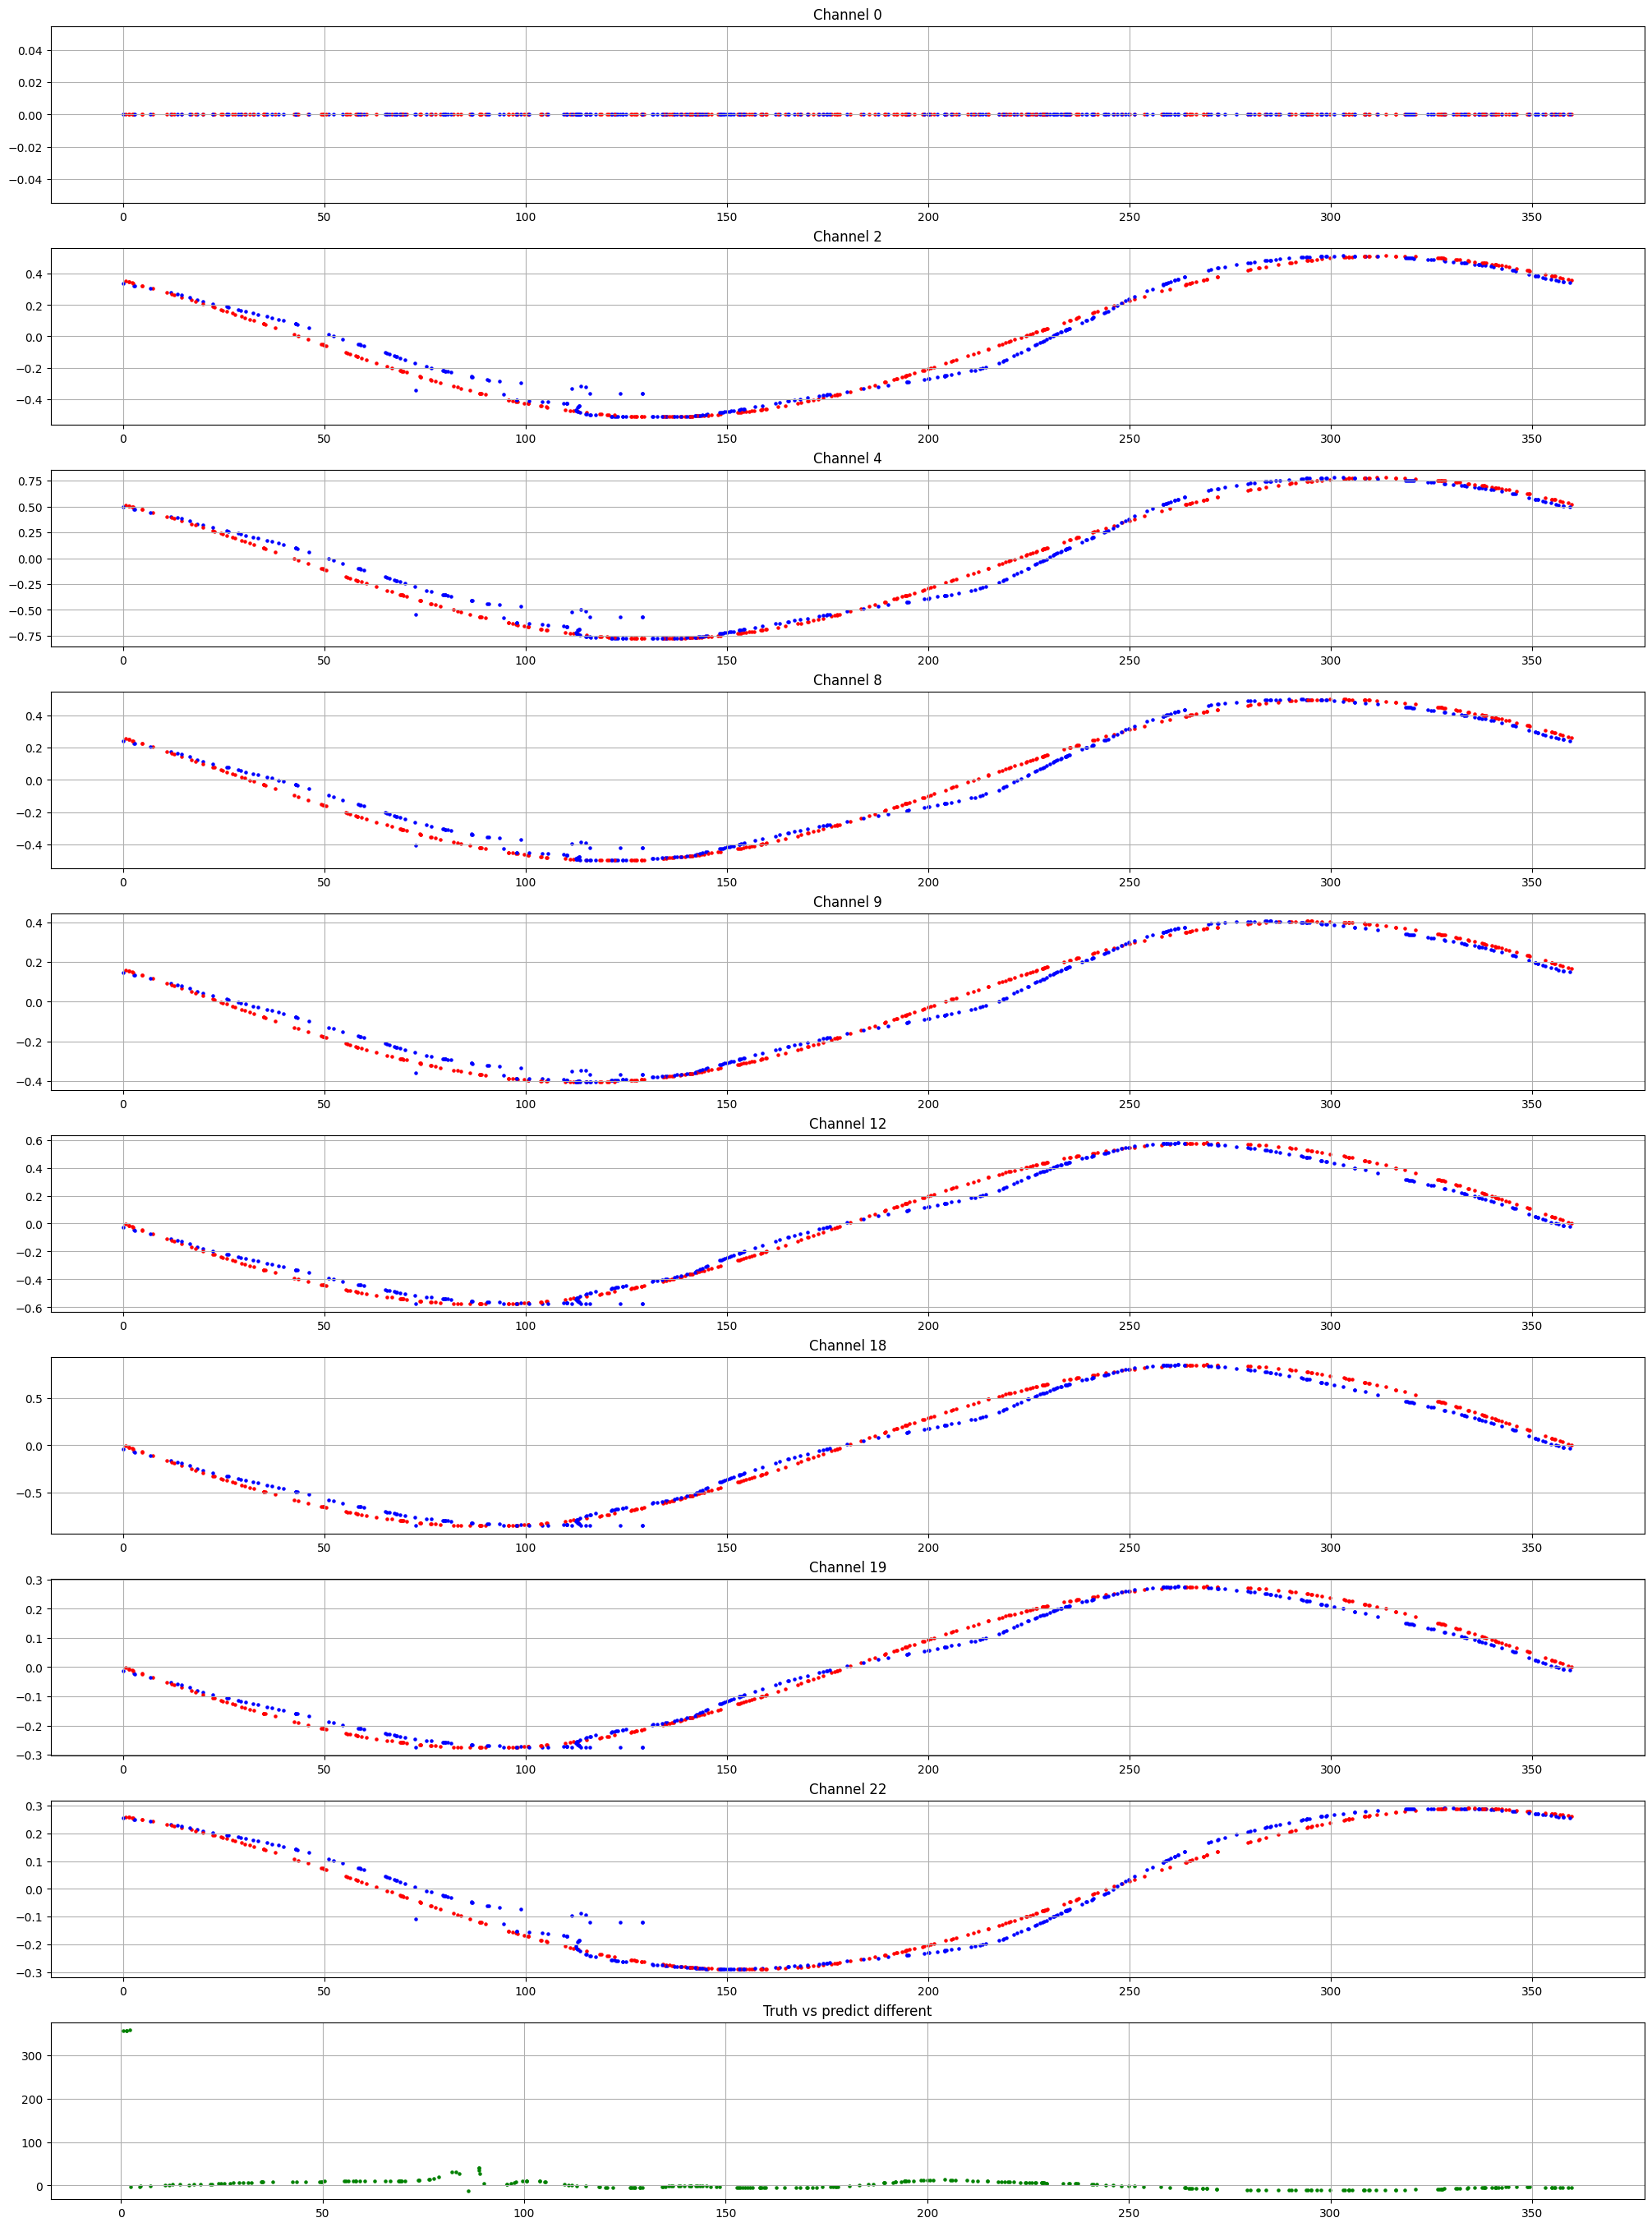

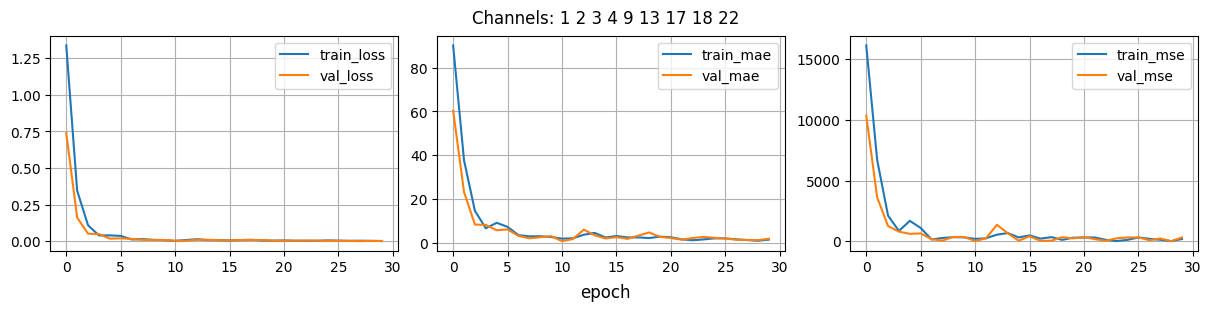

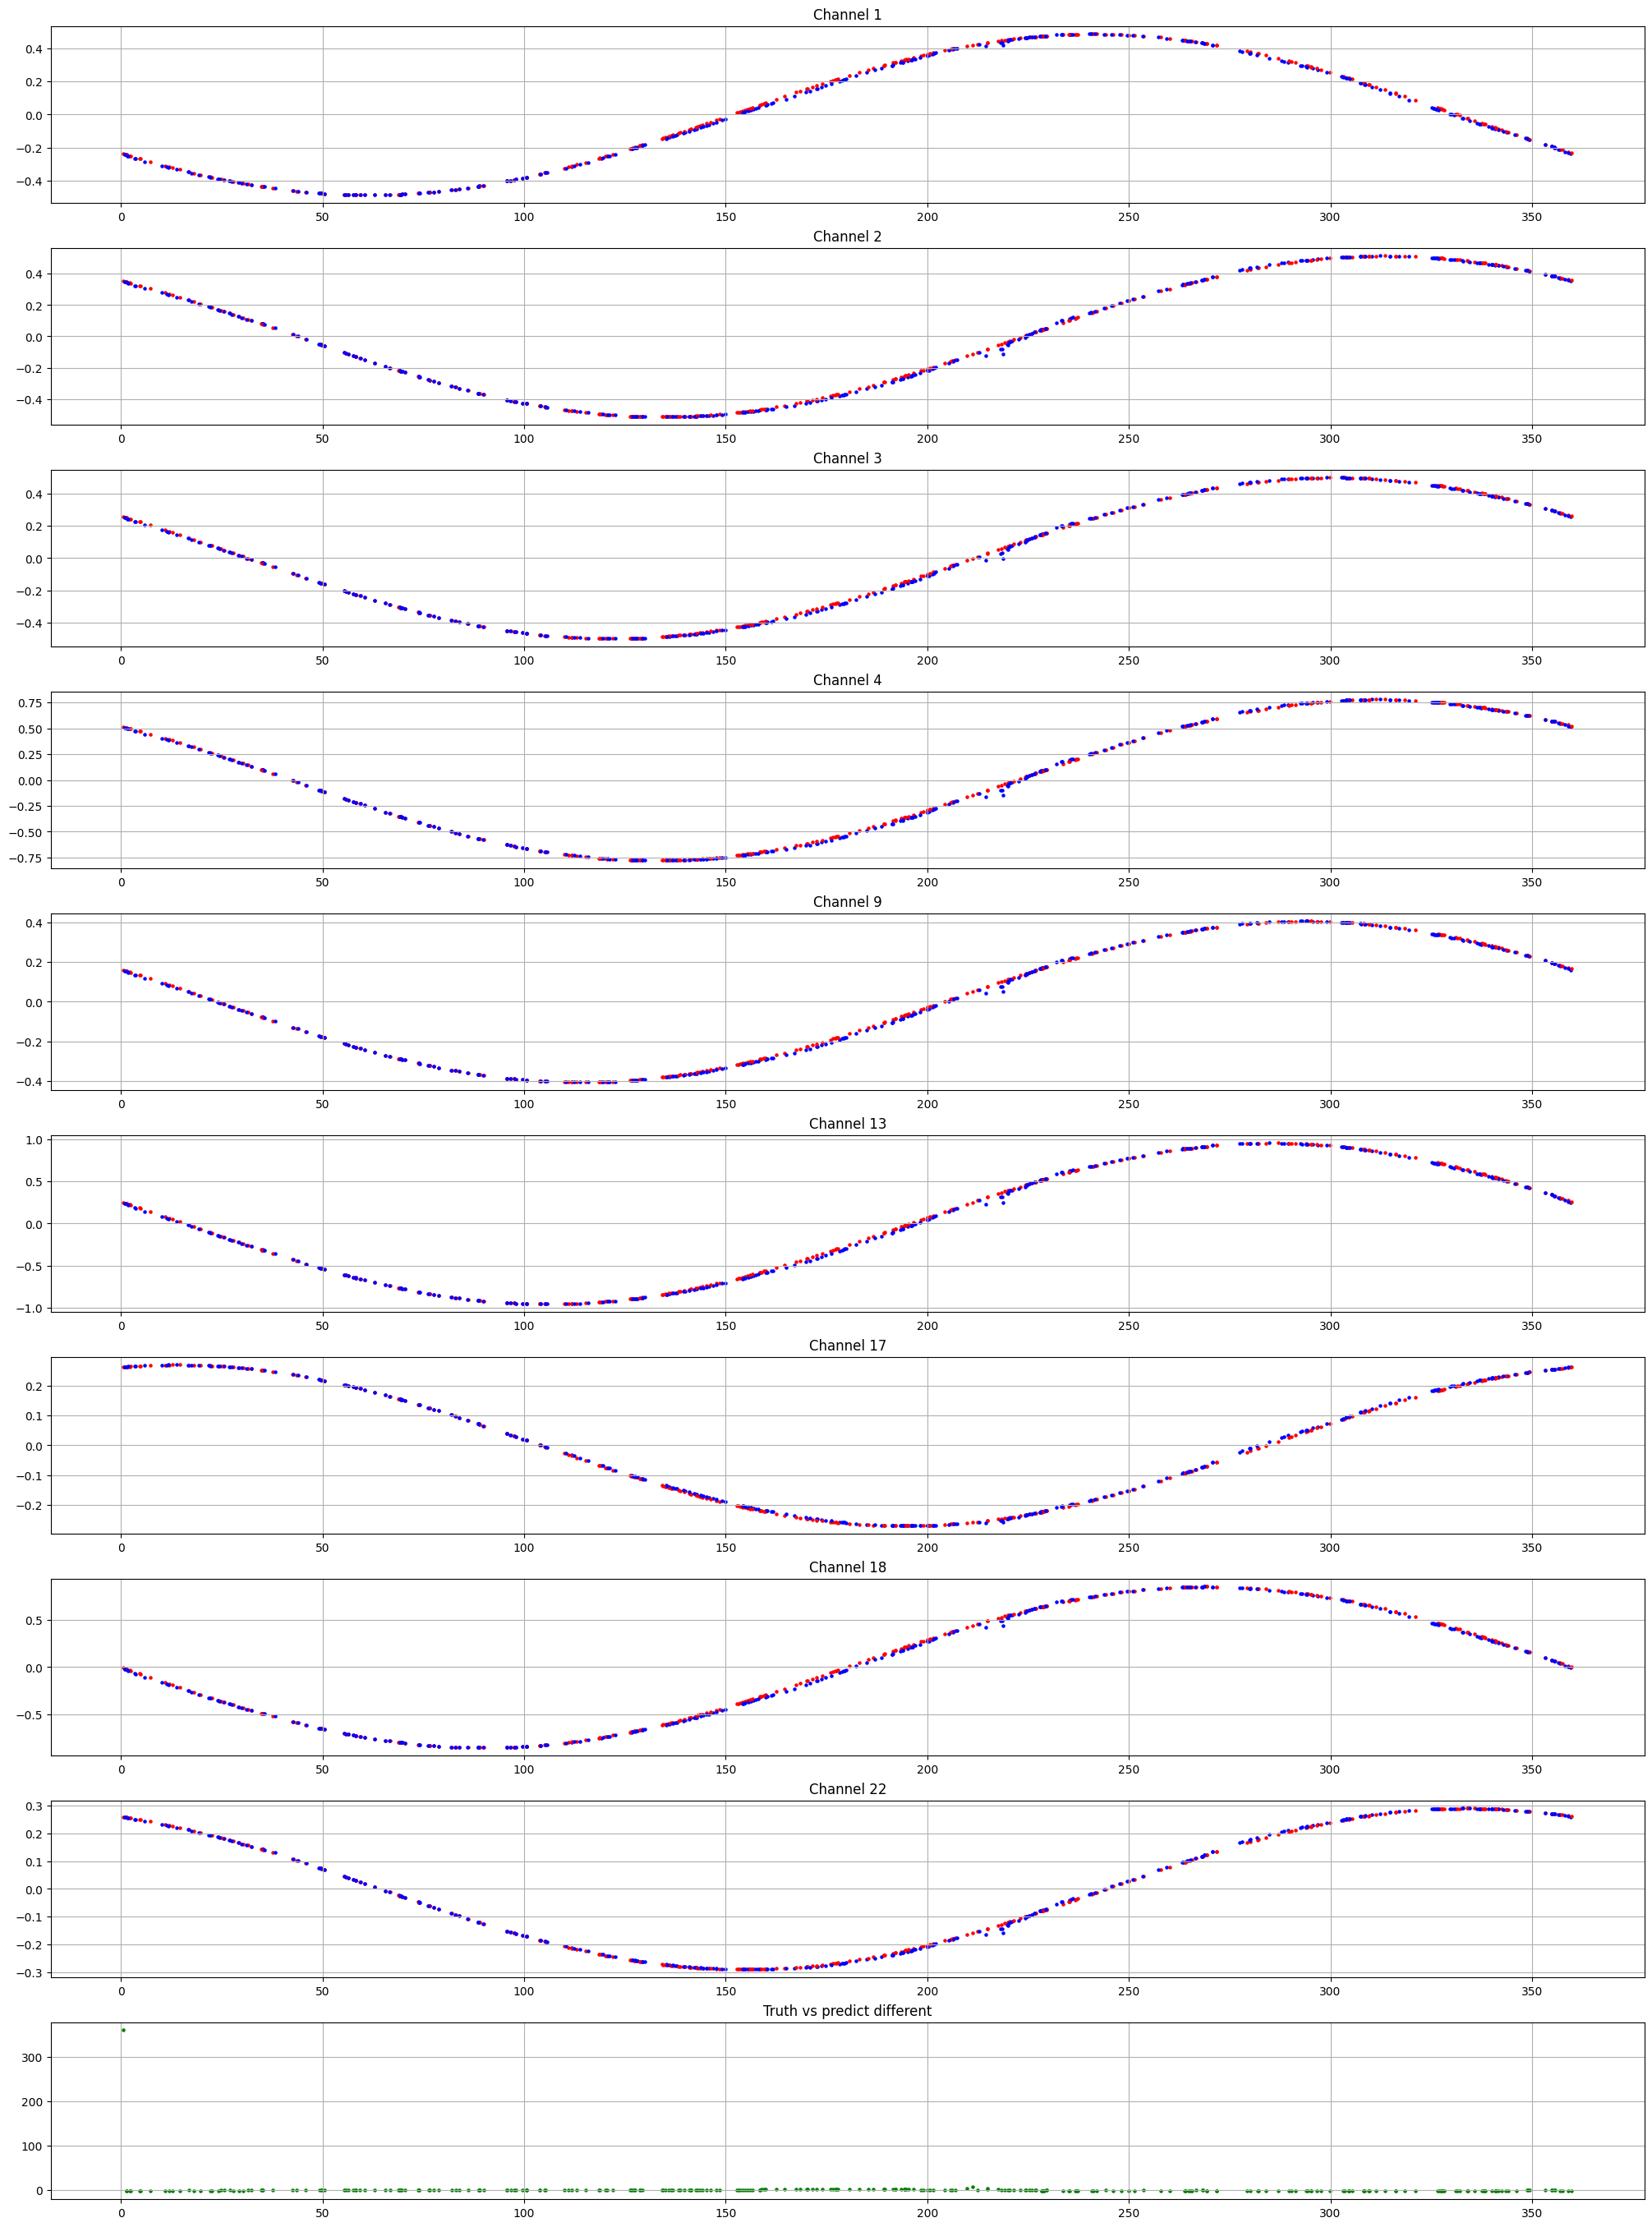

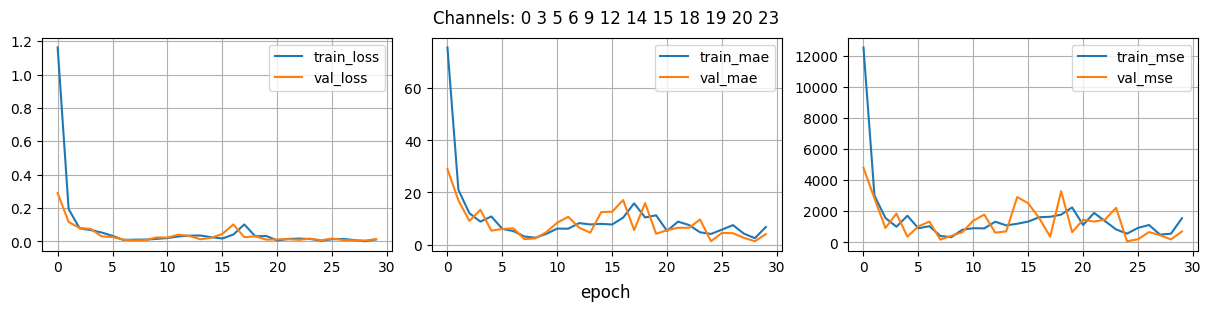

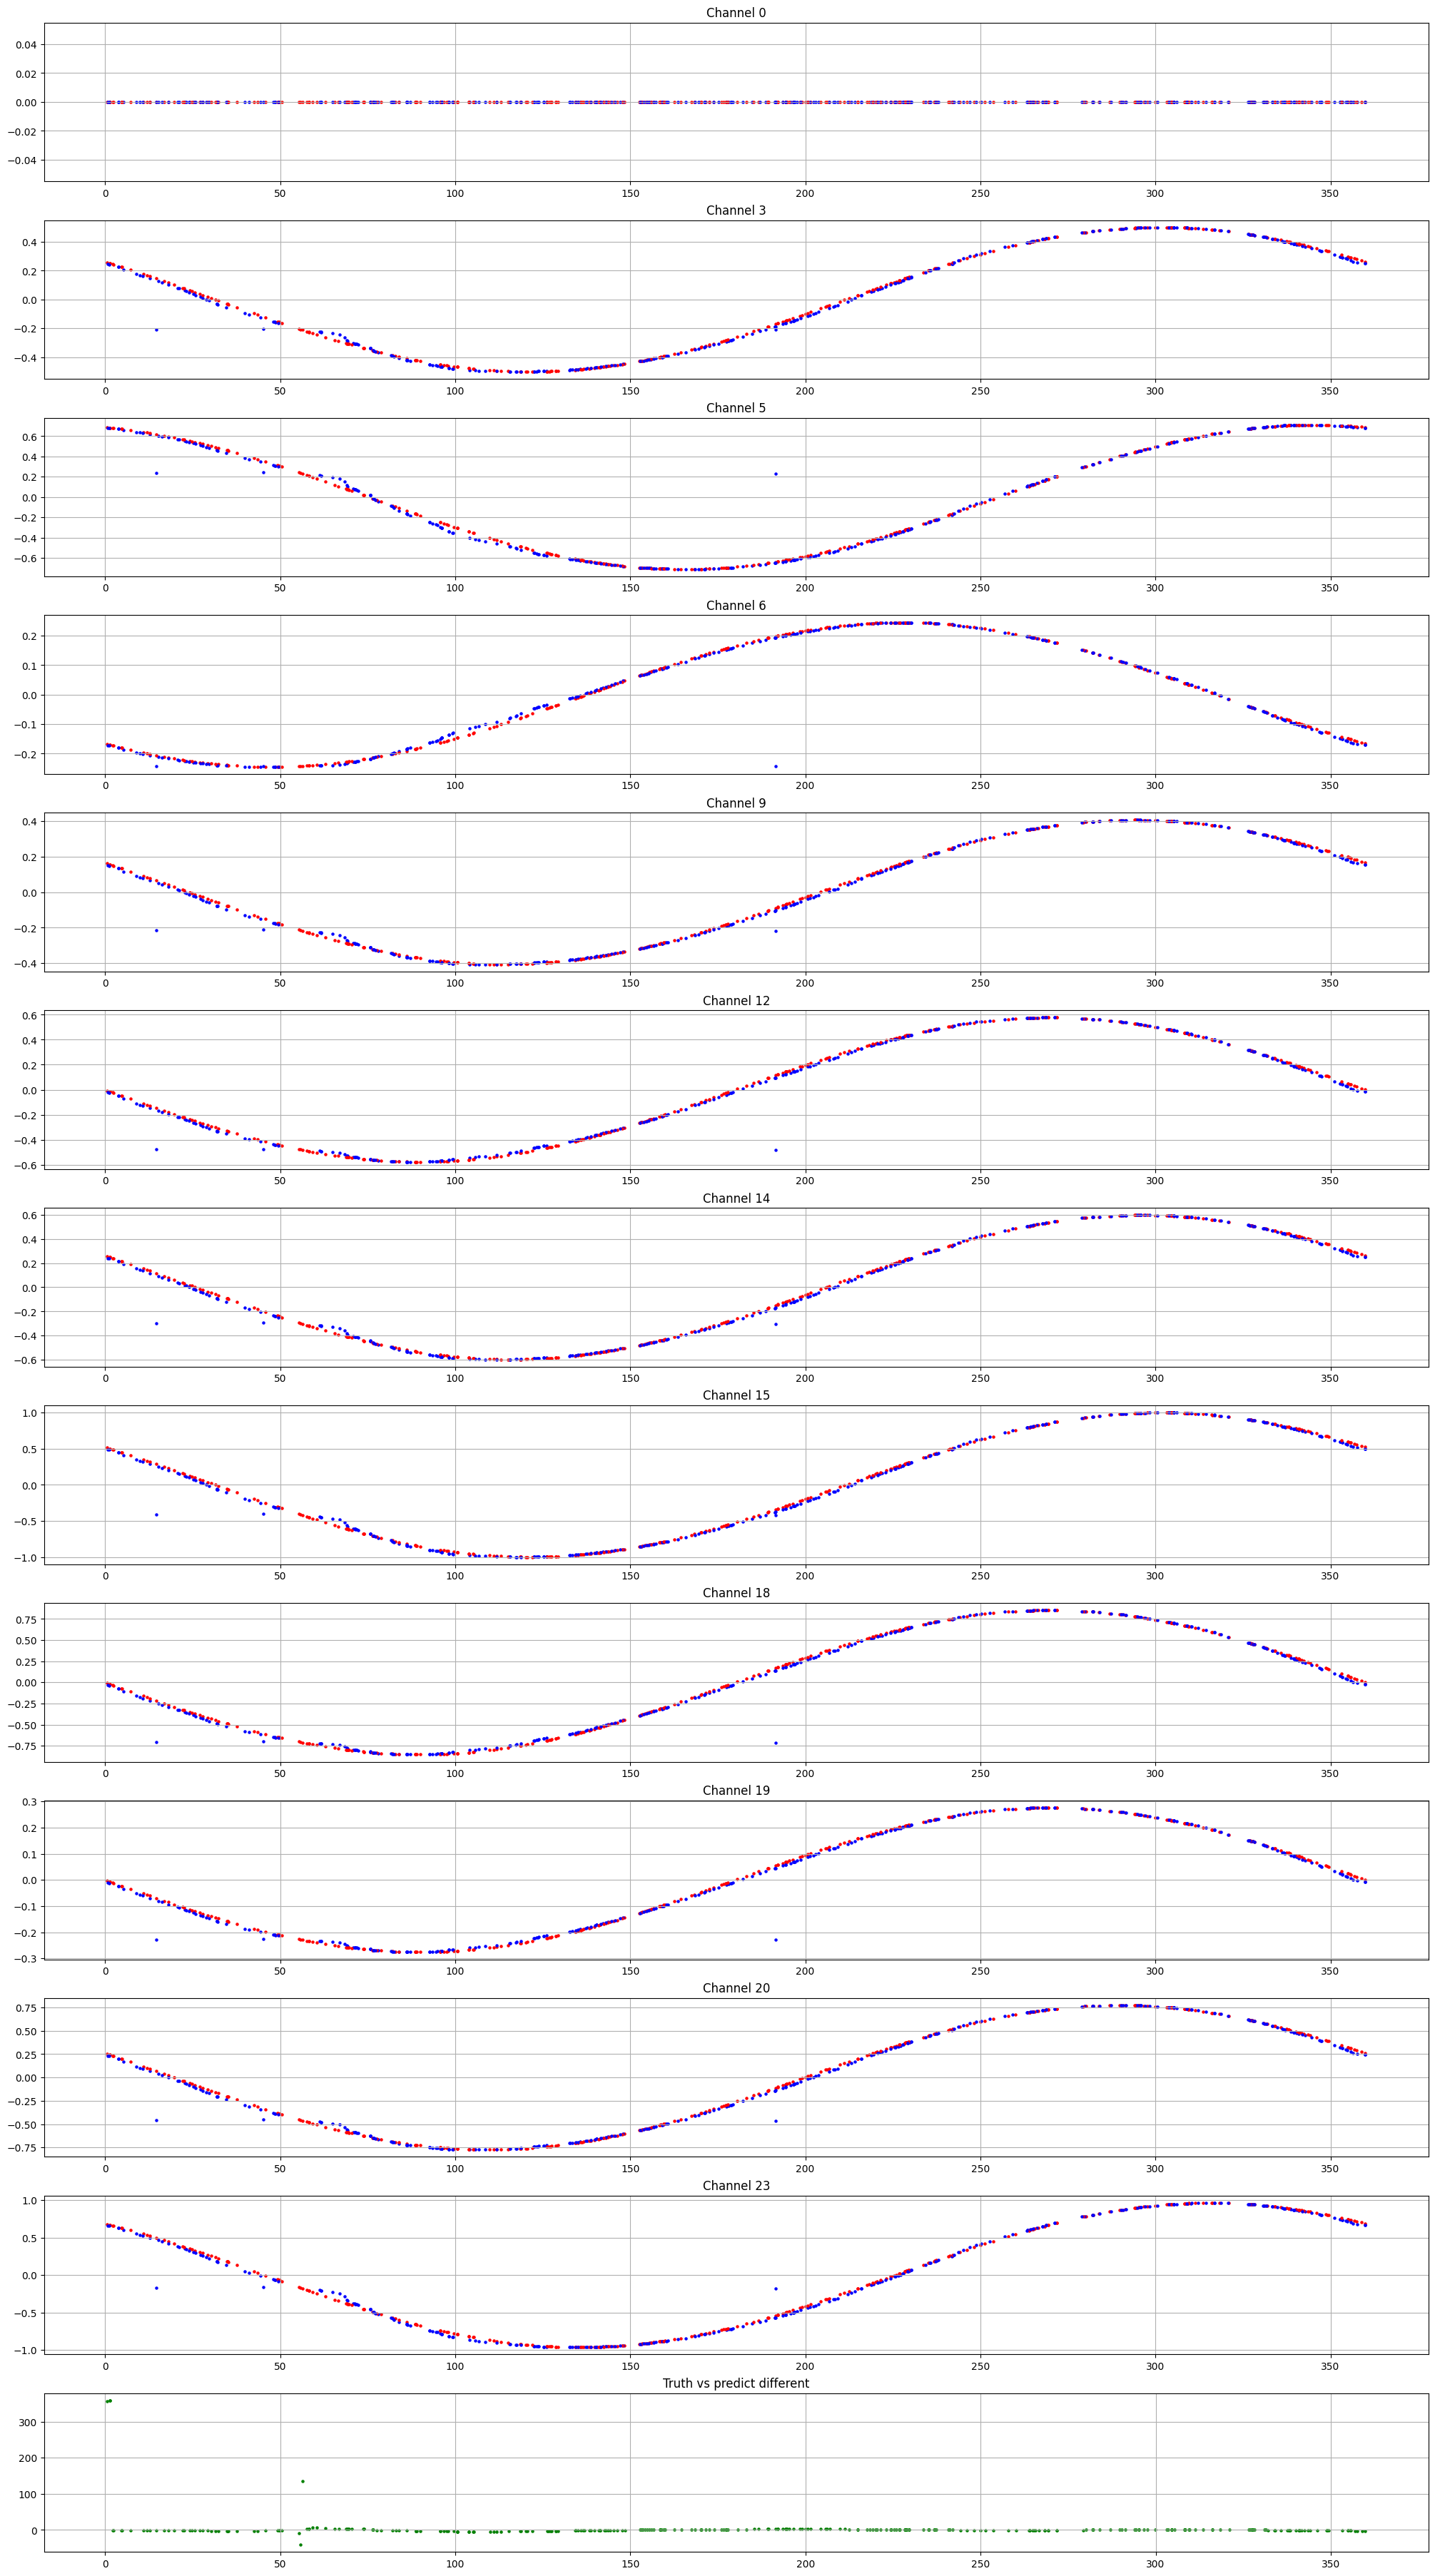

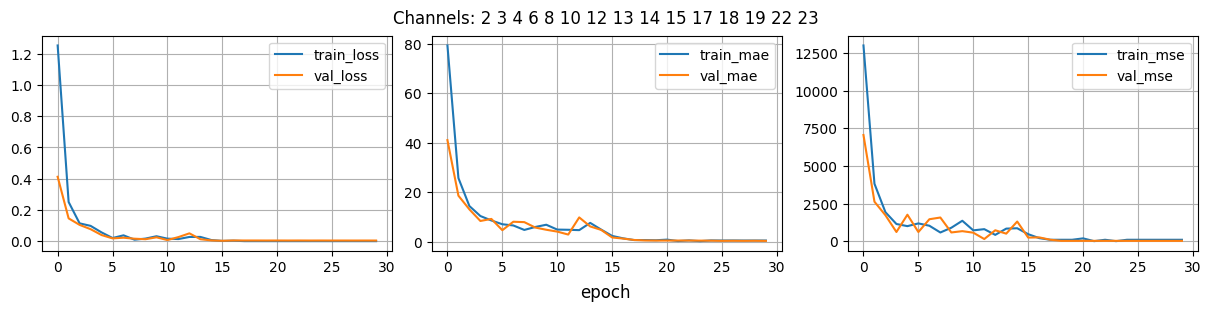

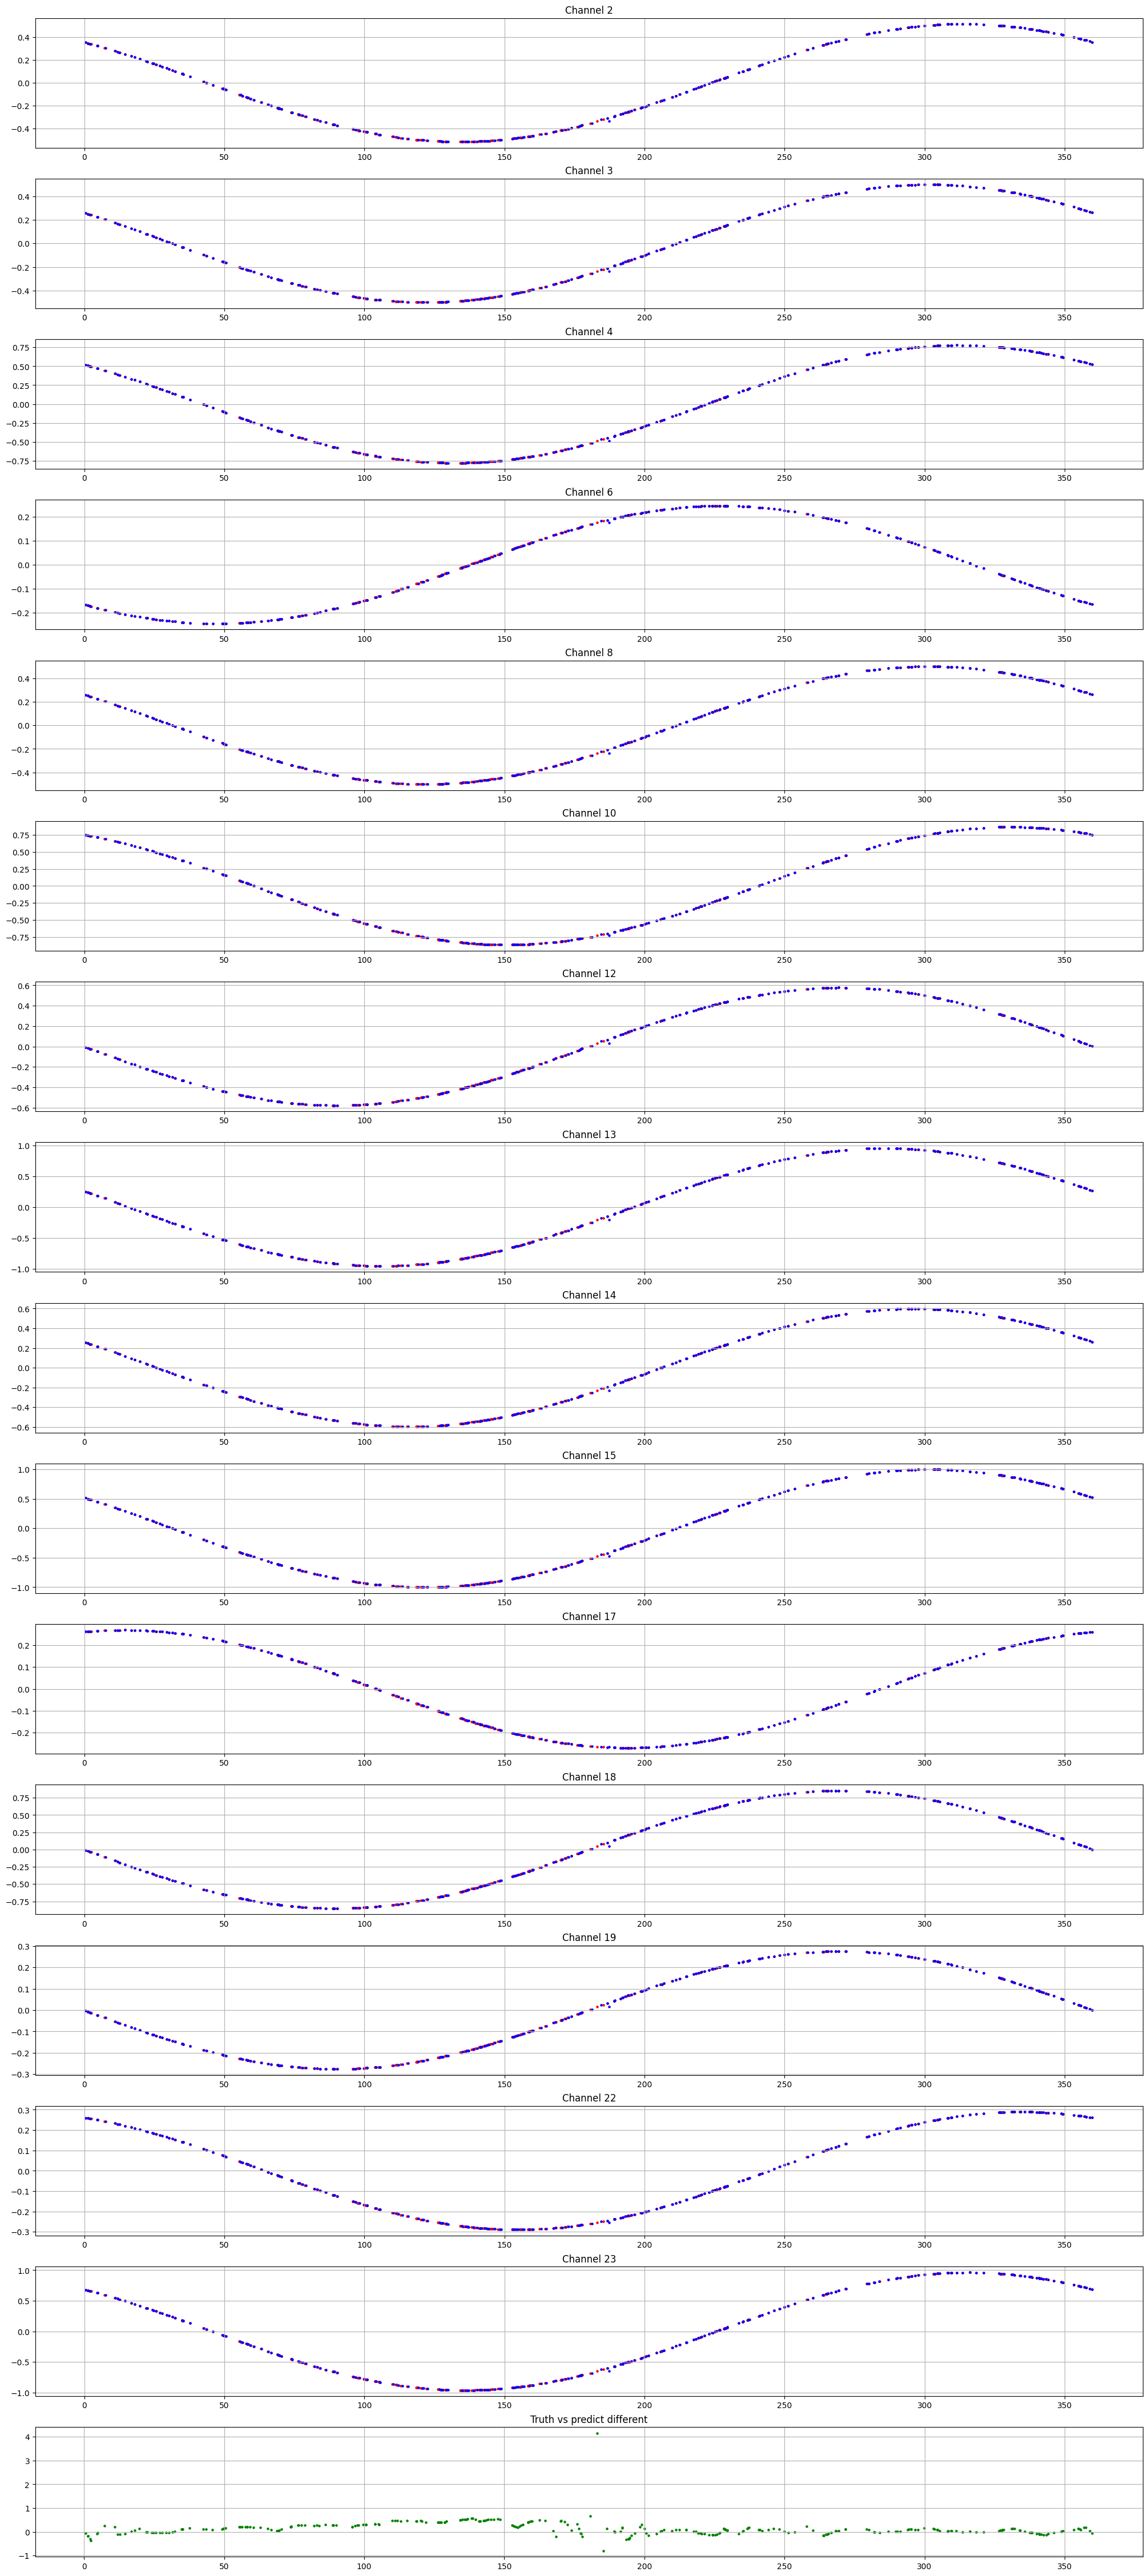

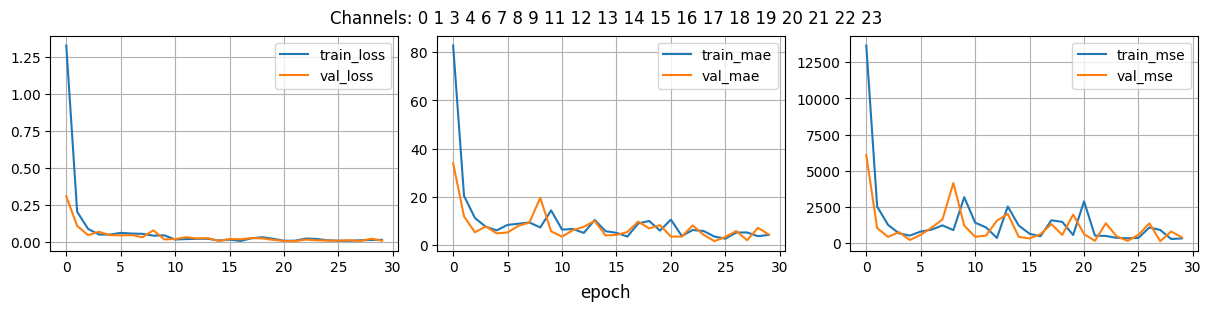

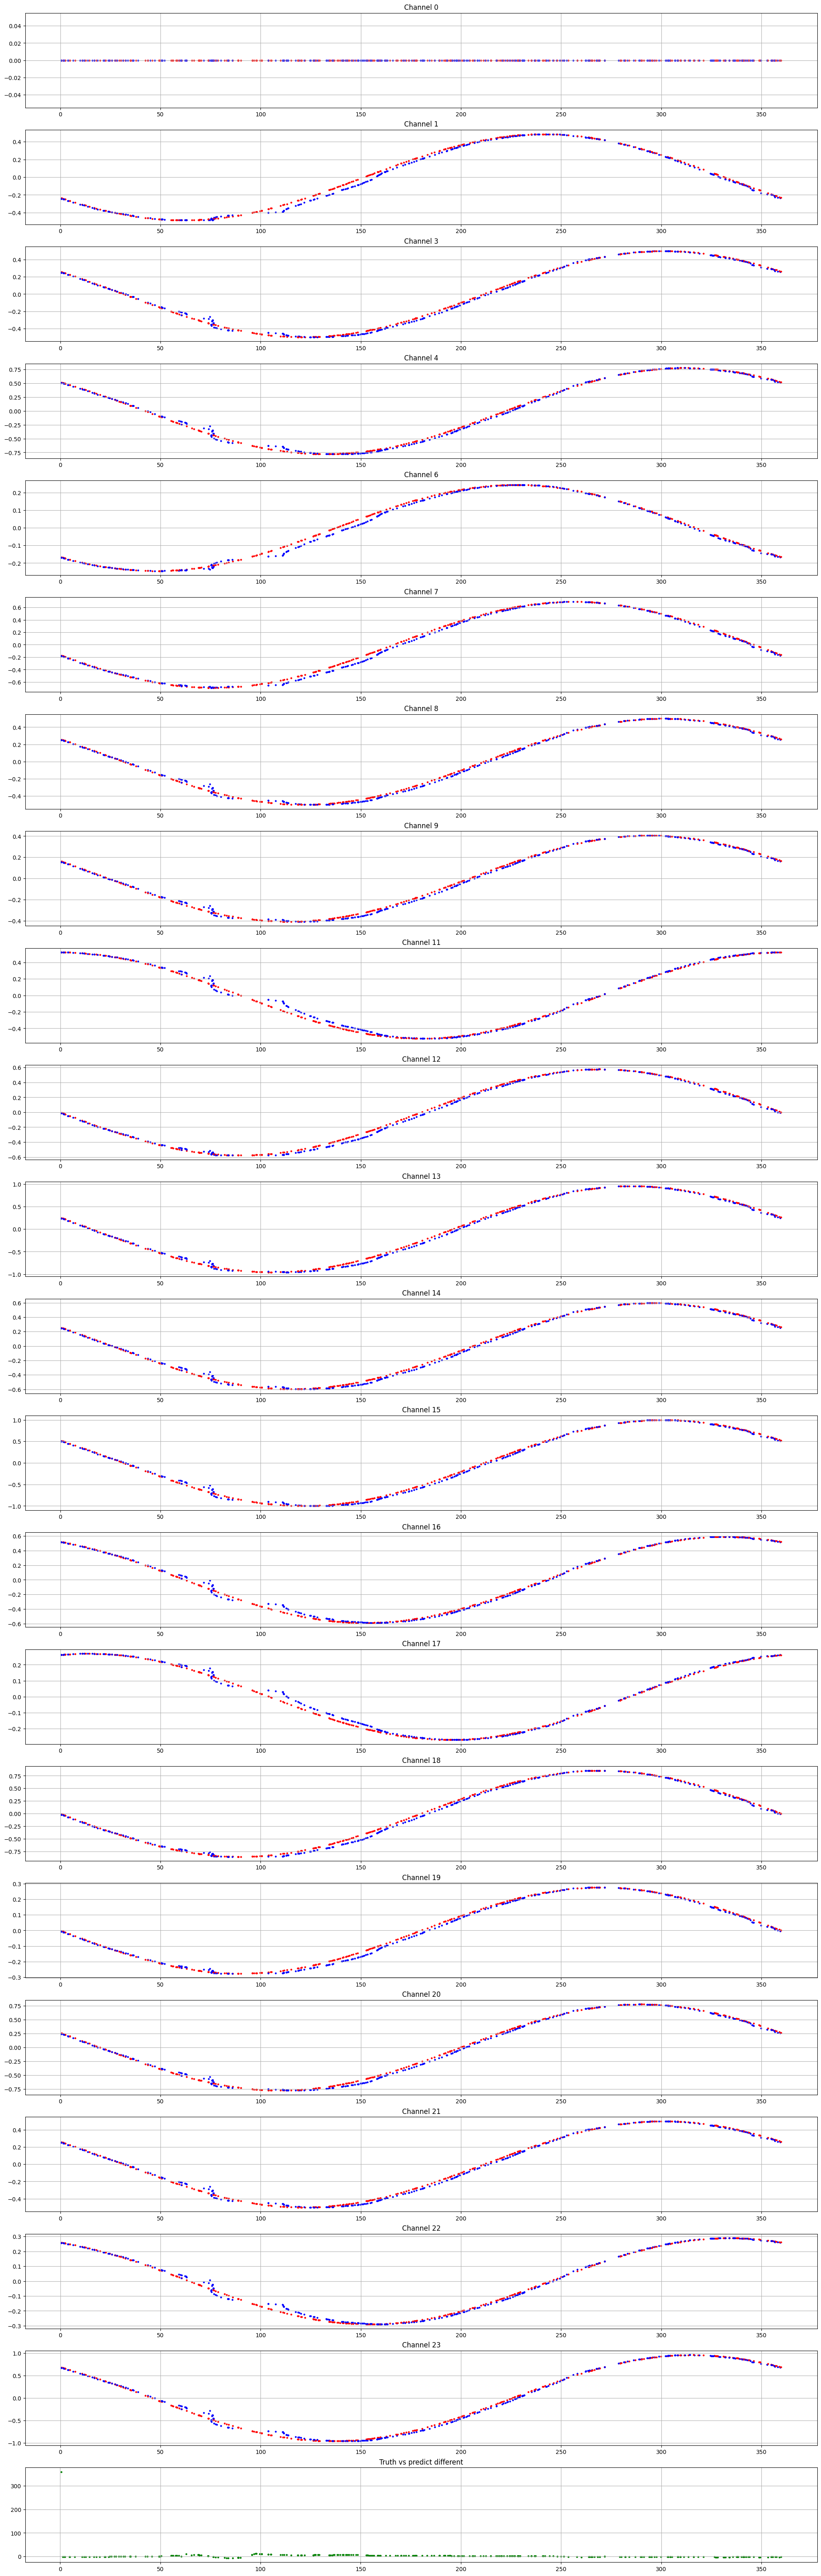

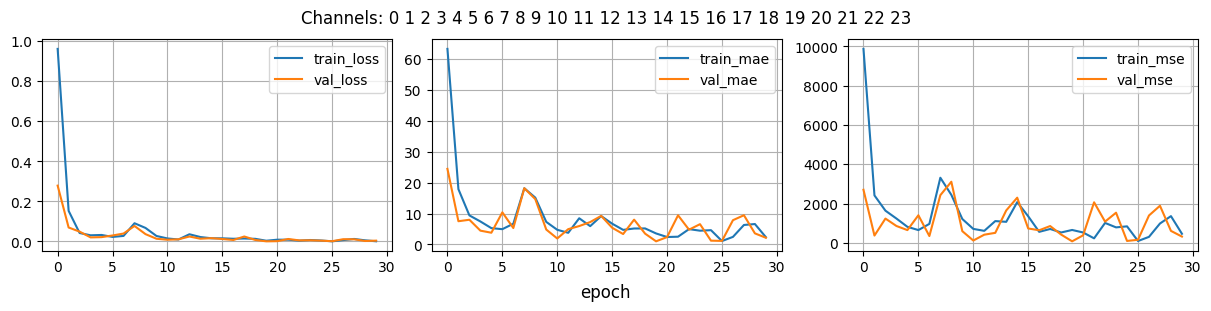

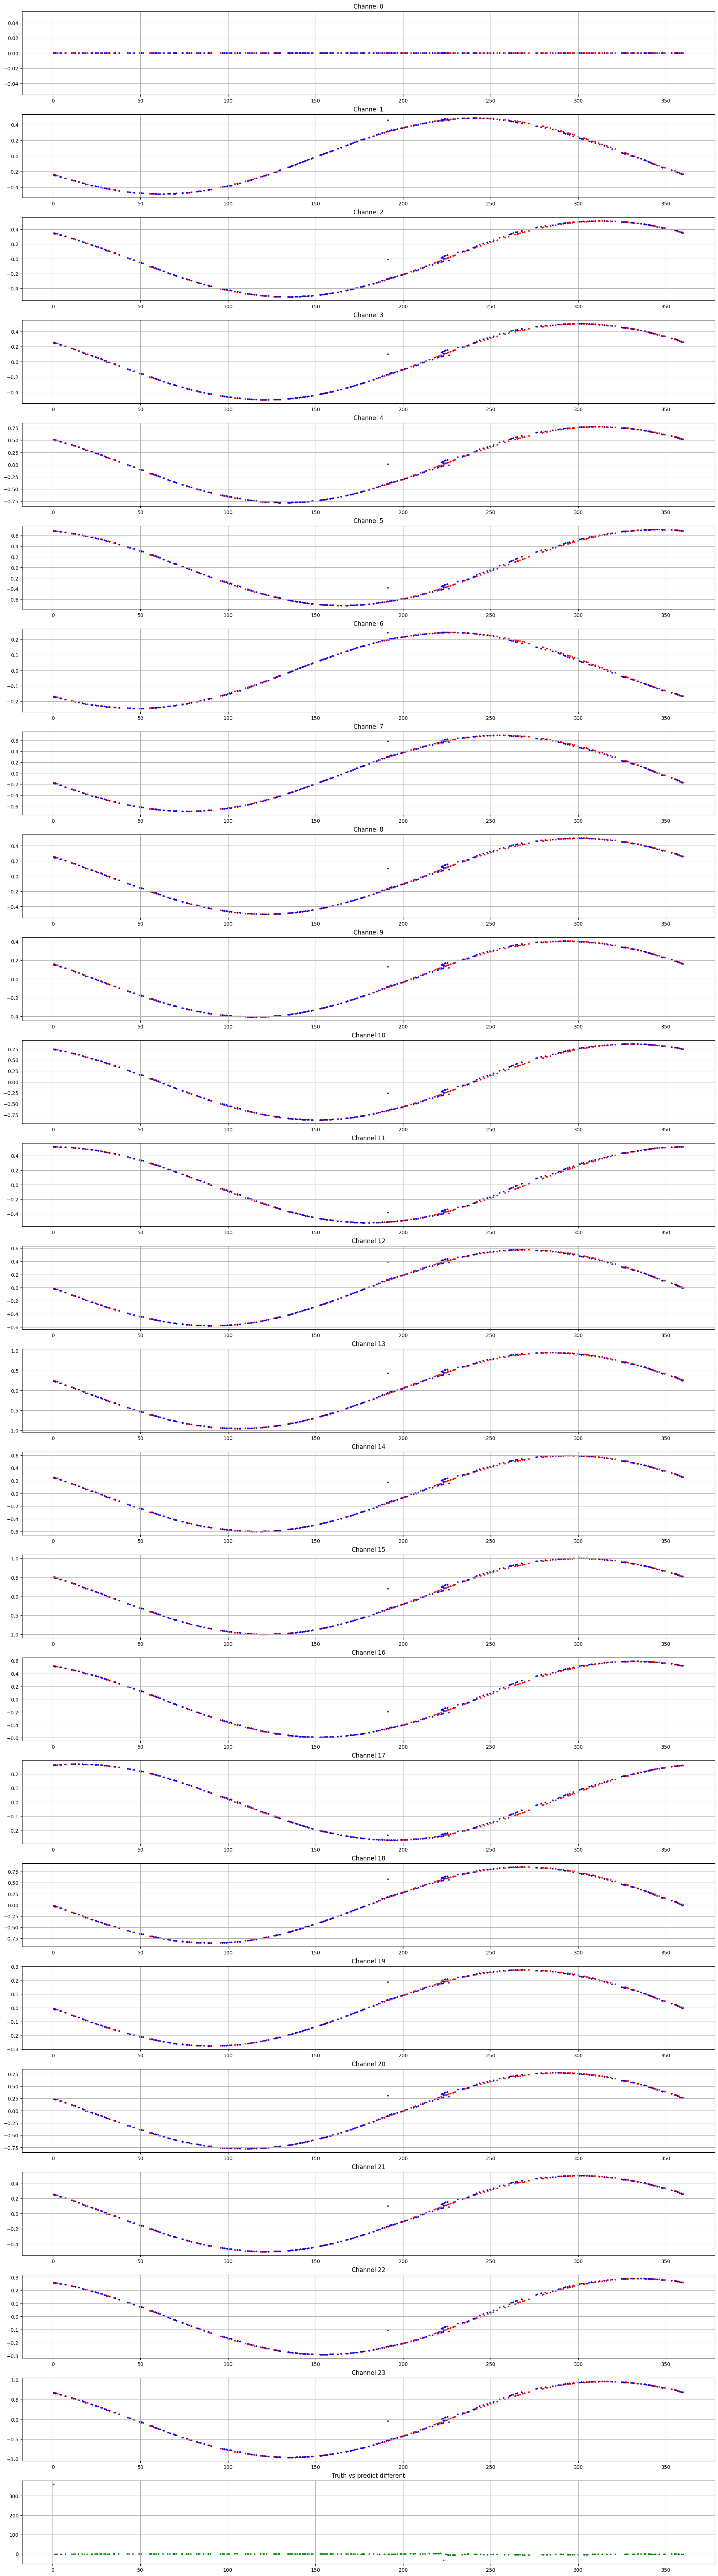

In [103]:
models, evaluates, losses = training_evaluation(top_list_channels, inputs, labels,\
                                                he_initializer=True, loss = 'cossin',\
                                                floormod=True, epochs=30, plot=True)
evaluates

In [ ]:
models, evaluates, losses = training_evaluation(top_list_channels, inputs, labels,\
                                                he_initializer=True, loss = 'cossin',\
                                                floormod=False, epochs=30, plot=True)
evaluates

2025-03-31 21:02:29.832546: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/tmp/ipykernel_2556863/128754474.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt .subplots(ncols = 3, nrows=1, figsize=(12,3), layout="constrained")


[[0.0007005340303294361, 64734.55859375, 180.82177734375],
 [3.0398299713851884e-05, 64784.06640625, 180.0445556640625],
 [0.0004898459301330149, 65086.40625, 180.82504272460938],
 [0.011539141647517681, 56924.78515625, 159.55084228515625],
 [4.447863466339186e-05, 64707.76171875, 179.9674530029297],
 [0.013899647630751133, 62772.9609375, 174.15646362304688],
 [1.1629858818196226e-05, 64795.33203125, 180.07510375976562],
 [5.3842519264435396e-05, 64779.359375, 180.18067932128906],
 [0.03680408373475075, 58482.875, 165.98974609375],
 [1.1522600289026741e-05, 57868.5546875, 160.84271240234375],
 [3.299782838439569e-05, 64808.05859375, 180.0886688232422],
 [0.017072074115276337, 118657.890625, 326.68206787109375],
 [2.5083738364628516e-05, 64804.59375, 180.08792114257812],
 [7.818756421329454e-05, 100999.4296875, 280.763916015625],
 [0.00015575249562971294, 52759.703125, 146.6664276123047]]